# MODEL TRAINING

- Import relevant libraries
- Define features from EDA
- Import the data
- Obtain a suitable split for the data
- Resample the data
- Preprocessing pipelines for all samples
    - Check for rare values before implementing pipelines.
    - Encode categorical features
    - Handle outliers
    - Perform scaling
- Feature selection 
    - Categorical feature selection for various sampled data
    - Numerical feature selection for various sampled data
- Model selection and optimization

## 1.0) Import relevant libraries

In [2]:
#for data manipulation
import pandas as pd
import numpy as np

#for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#for data splitting
from sklearn.model_selection import train_test_split

#for feature selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

#for categorical encoding
from sklearn.preprocessing import OneHotEncoder

#for scaling
from sklearn.preprocessing import MinMaxScaler

#for model evaluation 
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

#predictive algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#sampling techniques
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [3]:
pd.set_option('mode.chained_assignment', None)

## 2.0) Define features from EDA

In [4]:
initial_features = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'height', 'gross_weight', 'ncap_rating',
                    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_defogger',
                    'is_brake_assist', 'is_central_locking', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'segment', 'fuel_type', 'max_torque', 'steering_type']

scaled_features = ['policy_tenure', 'age_of_car', 'age_of_policyholder']

categorical_features = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'is_front_fog_lights', 'is_rear_window_wiper', 
                        'is_rear_window_defogger', 'is_brake_assist', 'is_central_locking', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'segment', 'fuel_type', 
                        'max_torque', 'steering_type']

lo_card = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_defogger', 
           'is_brake_assist', 'is_central_locking', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw']

hi_card = ['segment', 'fuel_type', 'max_torque', 'steering_type']

rare_features = ['segment', 'max_torque', 'steering_type']

unscaled_features = initial_features[3:14]

numerical_features = scaled_features + unscaled_features

In [5]:
numerical_features

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'height',
 'gross_weight',
 'ncap_rating']

In [6]:
#confirm 
len(initial_features) == len(numerical_features) + len(categorical_features)

True

## 3.0) Import the data

In [7]:
data = pd.read_csv('dataset/data.csv')

In [8]:
#set the predictors[x] and the target[y]
x = data[initial_features]
y = data.is_claim

## 4.0) Split the data

- Apply split to data ingestion script.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0)

In [10]:
x_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_defogger,is_brake_assist,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,segment,fuel_type,max_torque,steering_type
39542,0.998082,0.15,0.490385,16206,3,6,1493,4,6,5.2,...,Yes,Yes,Yes,Yes,No,Yes,C2,Diesel,250Nm@2750rpm,Power
11589,0.782329,0.00,0.490385,17804,1,2,796,3,5,4.6,...,No,No,No,No,No,No,A,CNG,60Nm@3500rpm,Power
21337,0.713391,0.10,0.375000,8794,1,2,1197,4,5,4.8,...,No,Yes,Yes,Yes,Yes,Yes,B2,Petrol,113Nm@4400rpm,Electric
56297,0.339513,0.03,0.480769,6108,1,2,796,3,5,4.6,...,No,No,No,No,No,No,A,CNG,60Nm@3500rpm,Power
25297,0.214826,0.03,0.538462,6112,1,2,796,3,5,4.6,...,No,No,No,No,No,No,A,CNG,60Nm@3500rpm,Power


## 5.0) Resample the data

- Implement the RandomUnderSampler and RandomOverSampler techniques
- Determine the best sample set and implement

In [11]:
#for undersampling
RUS = RandomUnderSampler(random_state=45)
x_rus, y_rus = RUS.fit_resample(x_train, y_train)

#for oversampling
ROS = RandomOverSampler(random_state=45)
x_ros, y_ros = ROS.fit_resample(x_train, y_train)

In [12]:
print('The unsampled set has {} samples and {} features.'.format(x_train.shape[0], x_train.shape[1]))
print('The undersampled set has {} samples and {} features.'.format(x_rus.shape[0], x_rus.shape[1]))
print('The oversampled set has {} samples and {} features.'.format(x_ros.shape[0], x_ros.shape[1]))

The unsampled set has 55662 samples and 33 features.
The undersampled set has 7128 samples and 33 features.
The oversampled set has 104196 samples and 33 features.


## 6.0) Preprocessing pipelines

- Confirm rare features are commmon in various samples.
- Generate class to handle outliers in the preprocessing pipeline
- Handle outliers for the already scaled data
- Generate numerical and categorical preprocessing pipelines

In [13]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

In [14]:
from sklearn import set_config
set_config(display='diagram')

In [15]:
from sklearn.preprocessing import OrdinalEncoder

### 6.1) Rare features

In [16]:
rare_features

['segment', 'max_torque', 'steering_type']

In [17]:
x_test[rare_features].nunique() == x_train[rare_features].nunique()

segment          True
max_torque       True
steering_type    True
dtype: bool

In [18]:
x_rus[rare_features].nunique() == x_train[rare_features].nunique()

segment          True
max_torque       True
steering_type    True
dtype: bool

***Insight***

- The rare features from the data analysis notebook occur in both the undersampled and test splits.
- There will be no need for rare value imputation

### 6.2) Outlier imputation

In [19]:
#generate function for capping
def outlier_cap(df, col, a, b=0):
    df.loc[df[col] > a, col] = a
    df.loc[df[col] < b, col] = b

In [20]:
#display features with outliers and their respective upper and lower limits
out_dict = {
    'age_of_car' : [0.245, -0.115],
    'age_of_policyholder' : [0.822, 0.091],
    'population_density' : [58399.5, -25244.5]
}

`age_of_car`

In [21]:
#for unsampled set
outlier_cap(x_train, 'age_of_car', 0.245)

#for undersampled set
outlier_cap(x_rus, 'age_of_car', 0.245)

#for oversampled set
outlier_cap(x_ros, 'age_of_car', 0.245)

#for test set
outlier_cap(x_test, 'age_of_car', 0.245)

`age_of_policyholder`

In [22]:
#for unsampled set
outlier_cap(x_train, 'age_of_policyholder', 0.822, 0.091)

#for undersampled set
outlier_cap(x_rus, 'age_of_policyholder', 0.822, 0.091)

#for oversampled set
outlier_cap(x_ros, 'age_of_policyholder', 0.822, 0.091)

#for test set
outlier_cap(x_test, 'age_of_policyholder', 0.822, 0.091)

`population_density`

In [23]:
#for unsampled set
outlier_cap(x_train, 'population_density', 58399.5)

#for undersampled set
outlier_cap(x_rus, 'population_density', 58399.5)

#for oversampled set
outlier_cap(x_ros, 'population_density', 58399.5)

#for test set
outlier_cap(x_test, 'population_density', 58399.5)

In [24]:
#confirm
x_ros.population_density.max()

58399.5

### 6.3) Generate preprocessing pipelines

In [25]:
num_preprocessor = Pipeline(
    steps=[
           ('scaler', MinMaxScaler(feature_range=(0,1)))
           ]
)

cat_preprocessor = Pipeline(
    steps=[
        ('encoder', OrdinalEncoder()),
        ('scale', MinMaxScaler(feature_range=(0,1)))
    ]
)

In [26]:
preprocessor  = ColumnTransformer([
    ('num', num_preprocessor, unscaled_features),
    ('cat', cat_preprocessor, categorical_features),
], remainder='passthrough'
)

In [27]:
preprocessing_pipeline = make_pipeline(
    preprocessor
)

In [28]:
preprocessing_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['population_density', 'make',
                                                   'airbags', 'displacement',
                                                   'cylinder', 'gear_box',
                                                   'turning_radius', 'length',
                                                   'height', 'gross_weight',
                                                   'ncap_rating']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('scale',
                                                                   Min...
                                                   'is_adjustable_steering',
                                                   'is_tpms',
                                                   'is_parking_sensors',
                                                   'is_parking_camera',
                                                   'rear_brakes_type',
                                                   'transmission_type',
                                                   'is_front_fog_lights',
                                                   'is_rear_window_wiper',
                                                   'is_rear_window_defogger',
                                                   'is_brake_assist',
                                                   'is_central_locking',
                                                   'is_driver_seat_height_adjustable',
                                                   'is_day_night_rear_view_mirror',
                                                   'is_ecw', 'segment',
                                                   'fuel_type', 'max_torque',
                                                   'steering_type'])]))])

In [29]:
#generate a new train set with the pipeline
new_train = pd.DataFrame(preprocessing_pipeline.fit_transform(x_train, y_train))

In [30]:
new_train.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.273897,0.5,1.0,0.992877,1.0,1.0,1.000000,1.000000,0.457143,1.000000,...,1.0,0.0,1.0,0.8,0.5,0.500,1.0,0.998082,0.15,0.490385
1,0.301397,0.0,0.2,0.000000,0.0,0.0,0.142857,0.000000,0.000000,0.200299,...,0.0,0.0,0.0,0.0,0.0,0.625,1.0,0.782329,0.00,0.490385
2,0.146344,0.0,0.2,0.571225,1.0,0.0,0.428571,0.467836,0.157143,0.424514,...,1.0,1.0,1.0,0.4,1.0,0.000,0.0,0.713391,0.10,0.375000
3,0.100121,0.0,0.2,0.000000,0.0,0.0,0.142857,0.000000,0.000000,0.200299,...,0.0,0.0,0.0,0.0,0.0,0.625,1.0,0.339513,0.03,0.480769
4,0.100190,0.0,0.2,0.000000,0.0,0.0,0.142857,0.000000,0.000000,0.200299,...,0.0,0.0,0.0,0.0,0.0,0.625,1.0,0.214826,0.03,0.538462


In [31]:
pipeline_features = ['population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'height', 'gross_weight', 'ncap_rating', 'is_esc', 
                    'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'is_front_fog_lights', 'is_rear_window_wiper', 
                    'is_rear_window_defogger', 'is_brake_assist', 'is_central_locking', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'segment', 'fuel_type', 
                    'max_torque', 'steering_type', 'policy_tenure', 'age_of_car', 'age_of_policyholder']

In [32]:
new_train.columns = pipeline_features

In [33]:
new_train.head()

,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,height,gross_weight,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,segment,fuel_type,max_torque,steering_type,policy_tenure,age_of_car,age_of_policyholder
0,0.273897,0.5,1.0,0.992877,1.0,1.0,1.000000,1.000000,0.457143,1.000000,...,1.0,0.0,1.0,0.8,0.5,0.500,1.0,0.998082,0.15,0.490385
1,0.301397,0.0,0.2,0.000000,0.0,0.0,0.142857,0.000000,0.000000,0.200299,...,0.0,0.0,0.0,0.0,0.0,0.625,1.0,0.782329,0.00,0.490385
2,0.146344,0.0,0.2,0.571225,1.0,0.0,0.428571,0.467836,0.157143,0.424514,...,1.0,1.0,1.0,0.4,1.0,0.000,0.0,0.713391,0.10,0.375000
3,0.100121,0.0,0.2,0.000000,0.0,0.0,0.142857,0.000000,0.000000,0.200299,...,0.0,0.0,0.0,0.0,0.0,0.625,1.0,0.339513,0.03,0.480769
4,0.100190,0.0,0.2,0.000000,0.0,0.0,0.142857,0.000000,0.000000,0.200299,...,0.0,0.0,0.0,0.0,0.0,0.625,1.0,0.214826,0.03,0.538462


Repeat for undersampled, oversampled and test sets.

In [34]:
rus_train = pd.DataFrame(preprocessing_pipeline.transform(x_rus))

In [35]:
rus_train.columns = pipeline_features

In [36]:
ros_train = pd.DataFrame(preprocessing_pipeline.transform(x_ros))

In [37]:
ros_train.columns = pipeline_features

In [38]:
x_test = pd.DataFrame(preprocessing_pipeline.transform(x_test))
x_test.columns = pipeline_features

## 7.0) Feature selection methods

### 7.1) Categorical variables

- Select the best categorical features.
- Use approximately half of the maximum feature score as the threshold for feature selection

In [39]:
#define function for plotting graphs
def chi_plot(df, features, y):
    scores = chi2(df[features], y)

    p_values = pd.Series(scores[1], index=df[features].columns)
    p_values.sort_values(ascending=False, inplace=True)

    p_values.plot.bar(figsize=(20, 20))
    print(p_values)

rear_brakes_type                    0.936573
transmission_type                   0.926753
is_tpms                             0.886924
is_parking_camera                   0.875984
is_parking_sensors                  0.668088
is_rear_window_defogger             0.585296
is_rear_window_wiper                0.572109
is_esc                              0.541955
segment                             0.436046
is_central_locking                  0.376903
is_ecw                              0.376903
fuel_type                           0.163985
steering_type                       0.126944
is_day_night_rear_view_mirror       0.112151
max_torque                          0.087390
is_driver_seat_height_adjustable    0.085127
is_brake_assist                     0.071398
is_front_fog_lights                 0.053378
is_adjustable_steering              0.029124
dtype: float64


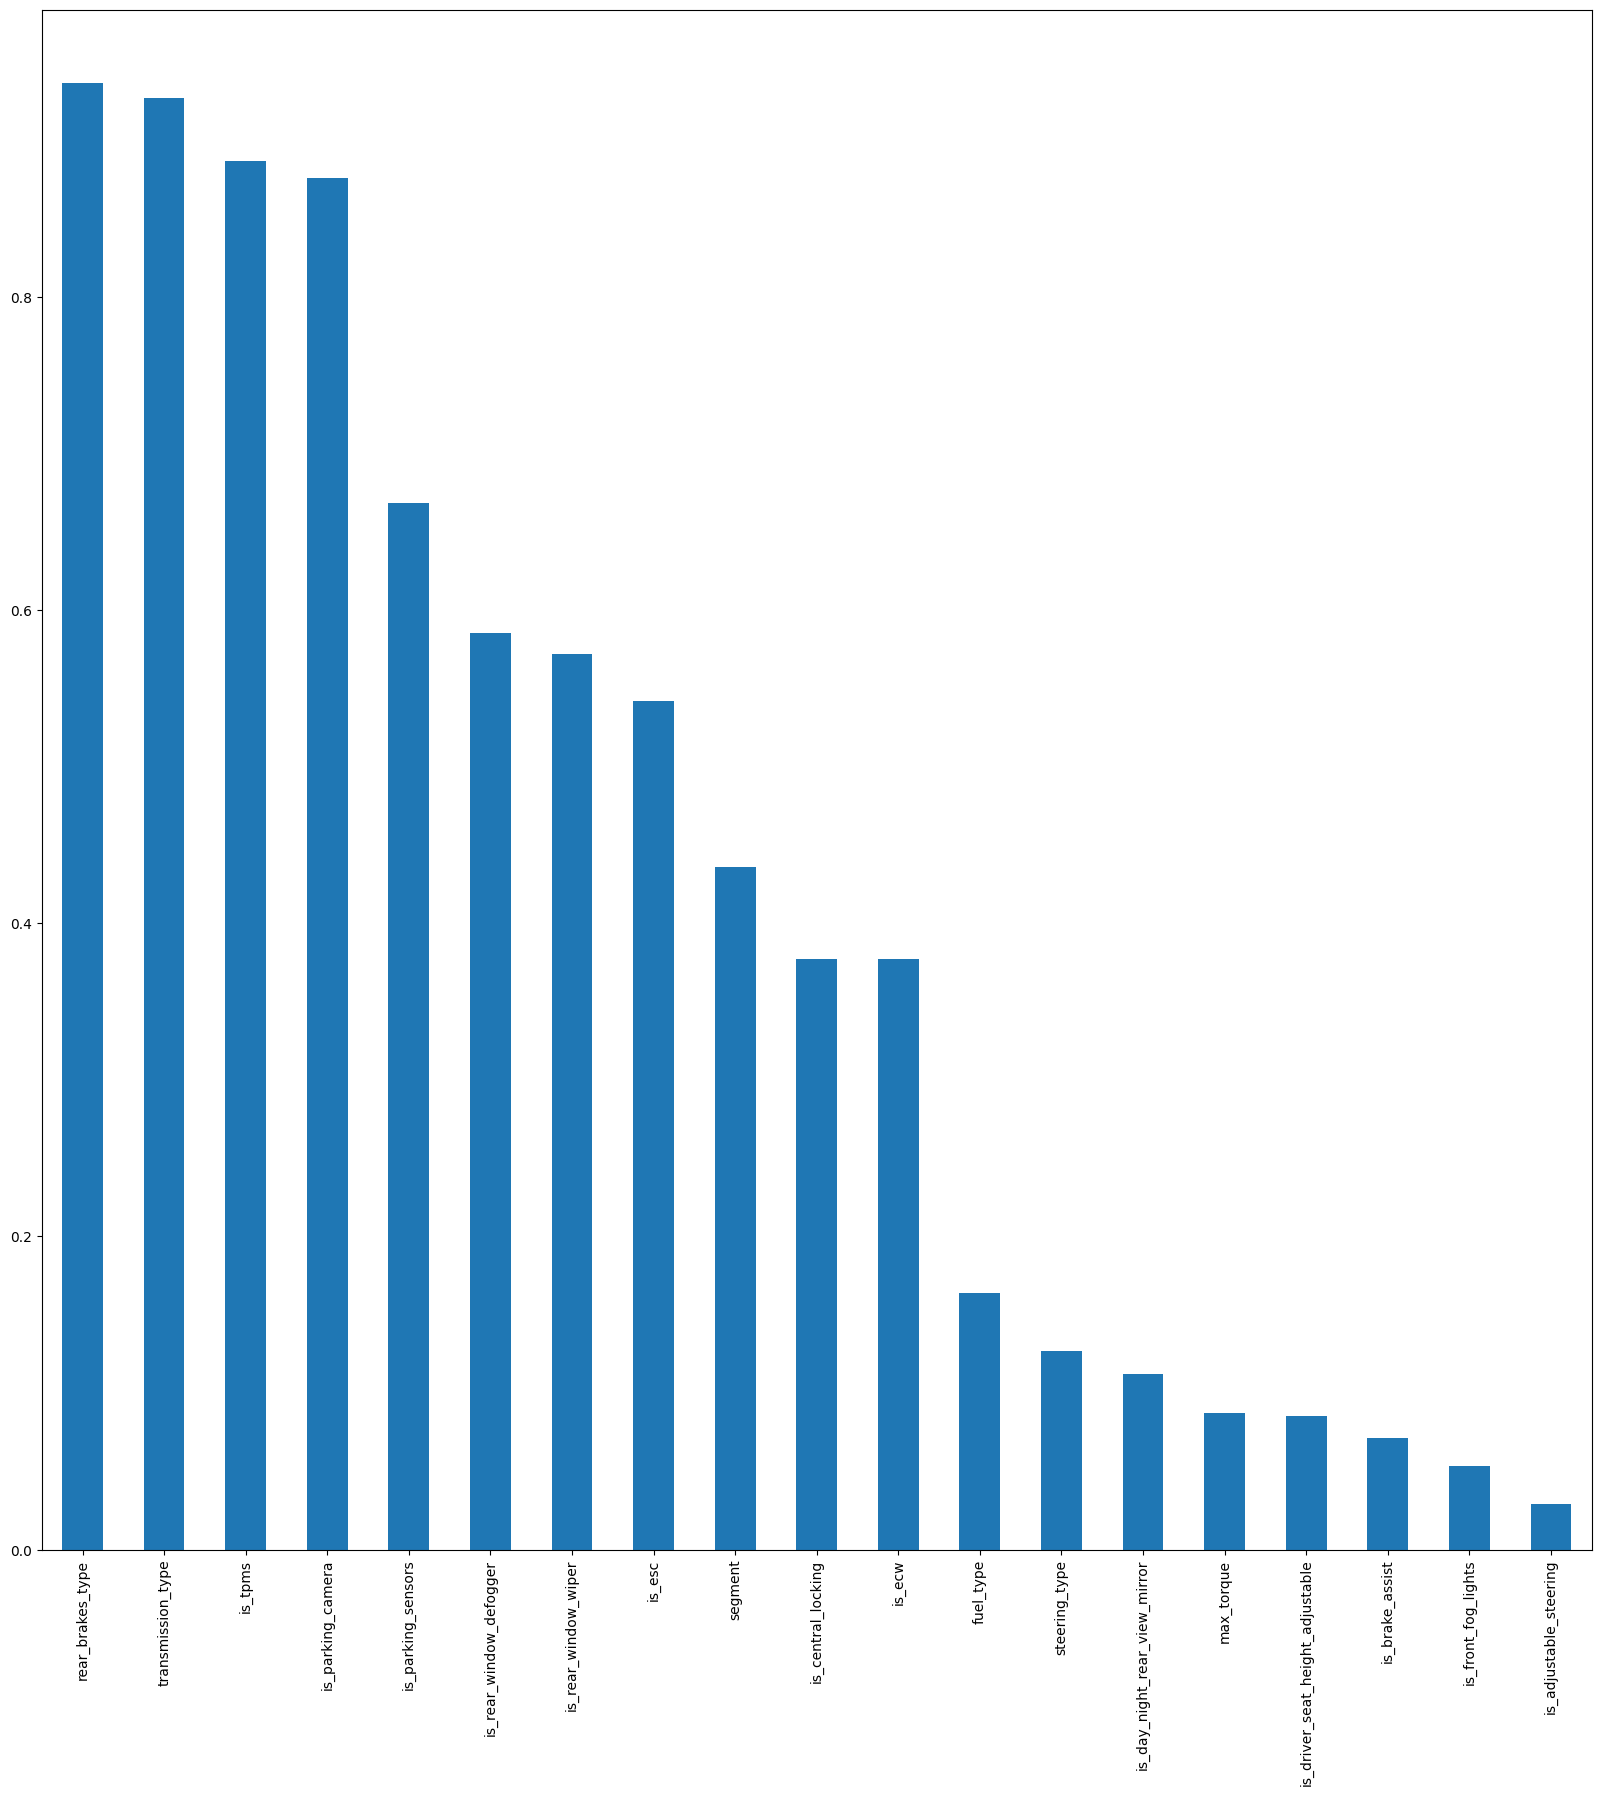

In [40]:
chi_plot(new_train, categorical_features, y_train)

transmission_type                   0.953163
rear_brakes_type                    0.838330
is_parking_camera                   0.790678
is_tpms                             0.717825
is_parking_sensors                  0.578131
is_rear_window_wiper                0.567499
is_rear_window_defogger             0.521839
is_esc                              0.433838
segment                             0.399192
is_central_locking                  0.344756
is_ecw                              0.344756
fuel_type                           0.164345
steering_type                       0.113478
is_day_night_rear_view_mirror       0.100394
is_driver_seat_height_adjustable    0.084248
is_front_fog_lights                 0.070247
is_brake_assist                     0.062559
max_torque                          0.059061
is_adjustable_steering              0.046195
dtype: float64


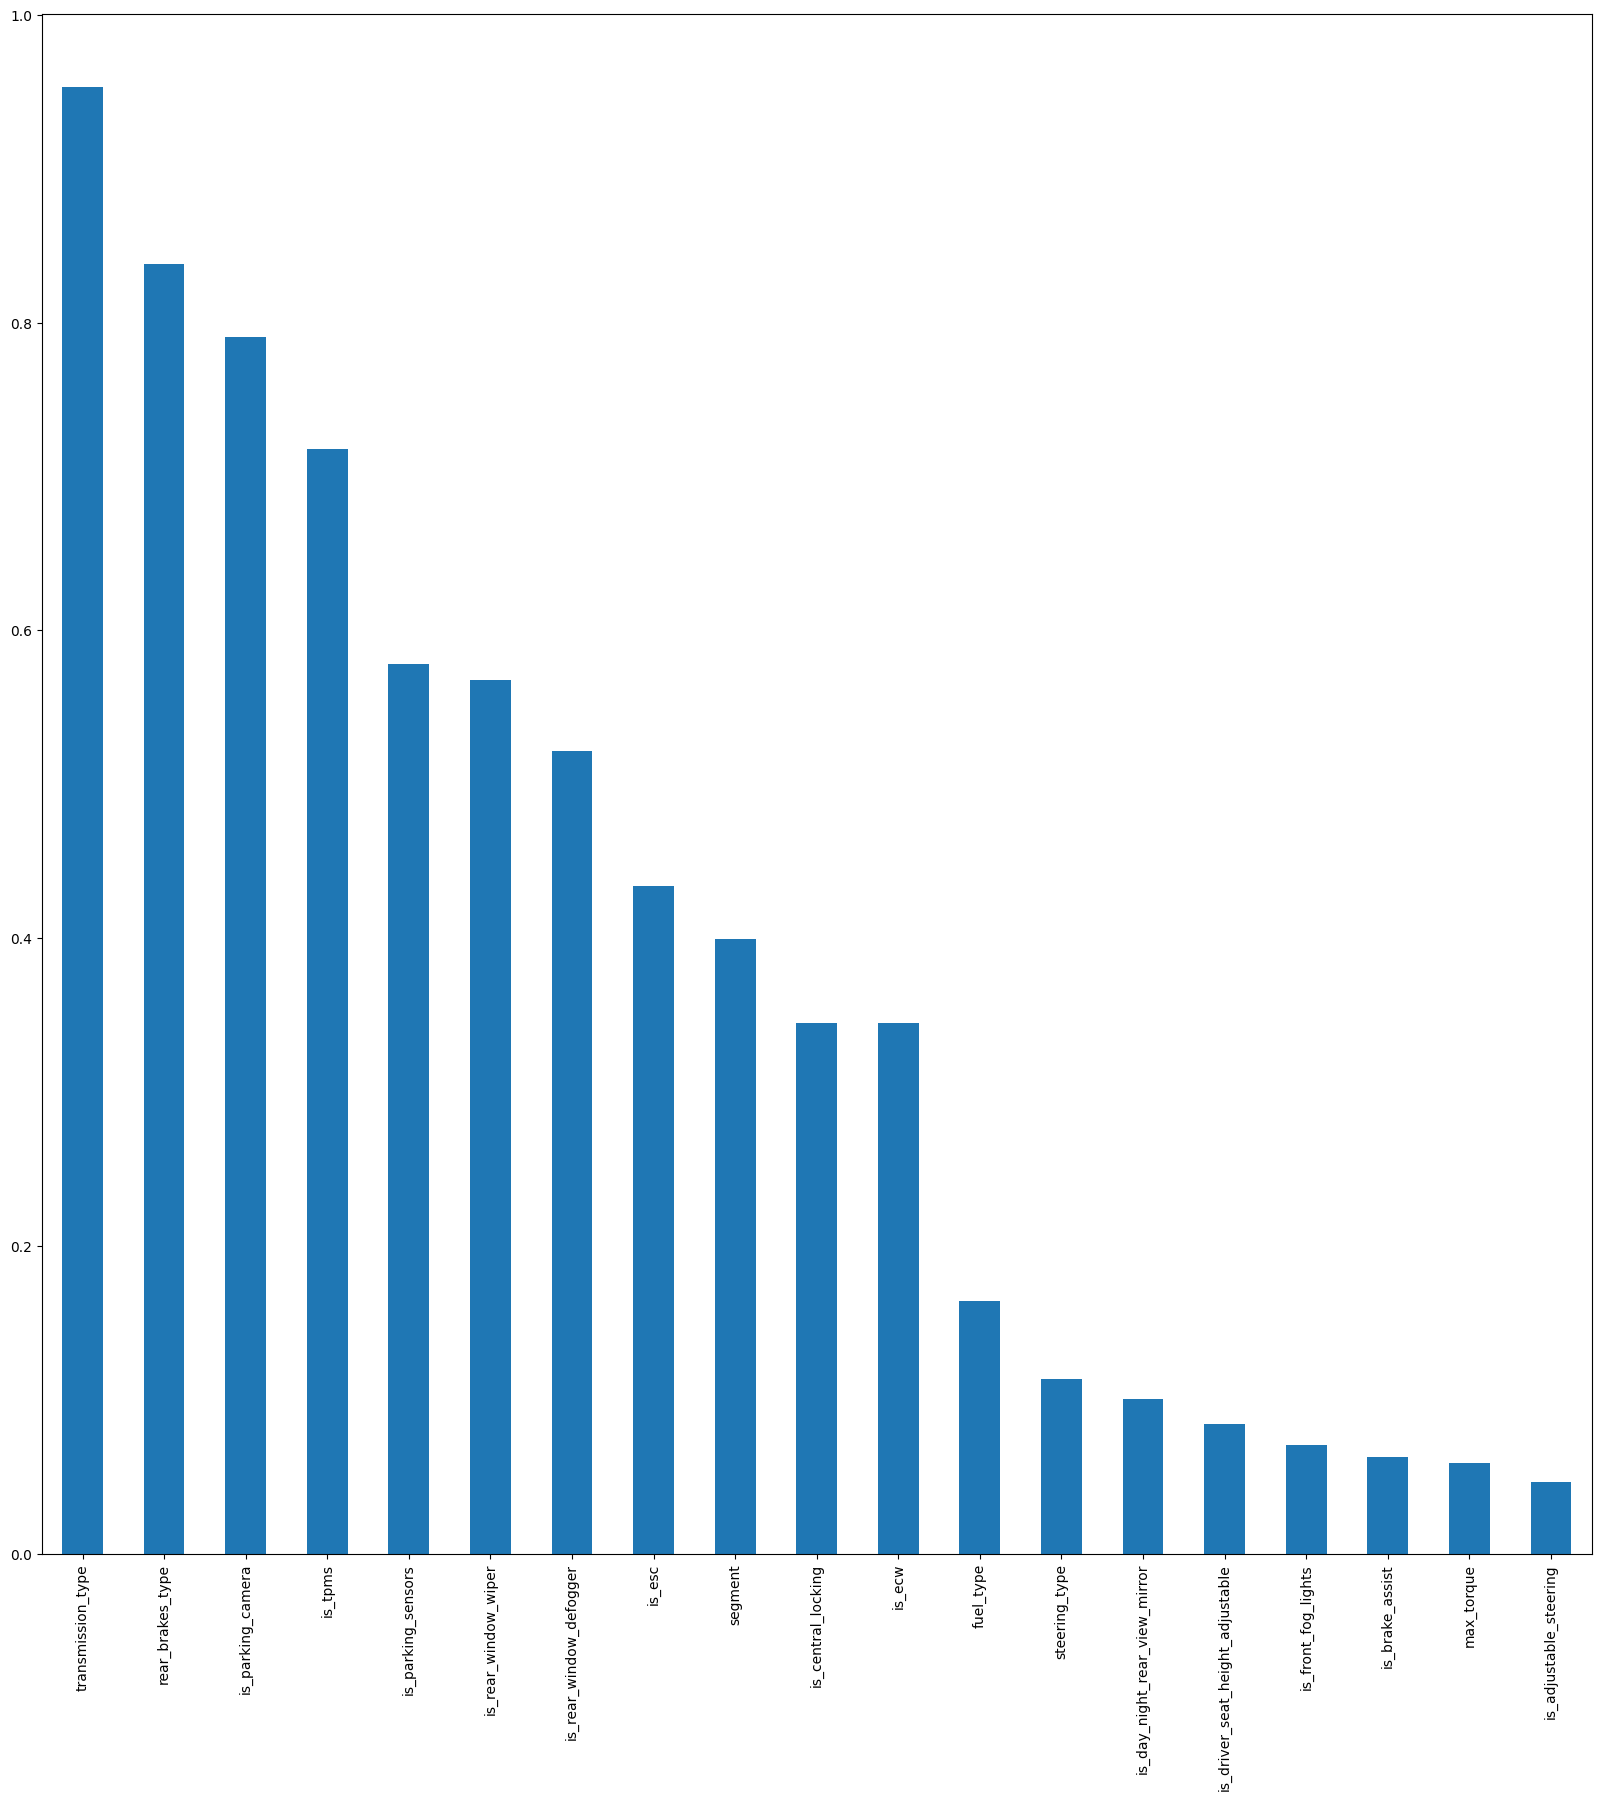

In [41]:
#for undersampled data
chi_plot(rus_train, categorical_features, y_rus)

is_parking_camera                   7.927508e-01
rear_brakes_type                    5.940417e-01
transmission_type                   5.389904e-01
is_tpms                             3.427045e-01
is_parking_sensors                  1.677756e-01
is_rear_window_wiper                1.744559e-02
segment                             1.670515e-02
is_esc                              1.290535e-02
is_central_locking                  1.222048e-02
is_ecw                              1.222048e-02
is_rear_window_defogger             1.070596e-02
fuel_type                           6.994080e-05
steering_type                       2.295553e-05
is_day_night_rear_view_mirror       5.645307e-06
max_torque                          1.580971e-07
is_driver_seat_height_adjustable    5.444152e-08
is_brake_assist                     4.931710e-08
is_front_fog_lights                 1.514723e-09
is_adjustable_steering              3.499228e-11
dtype: float64


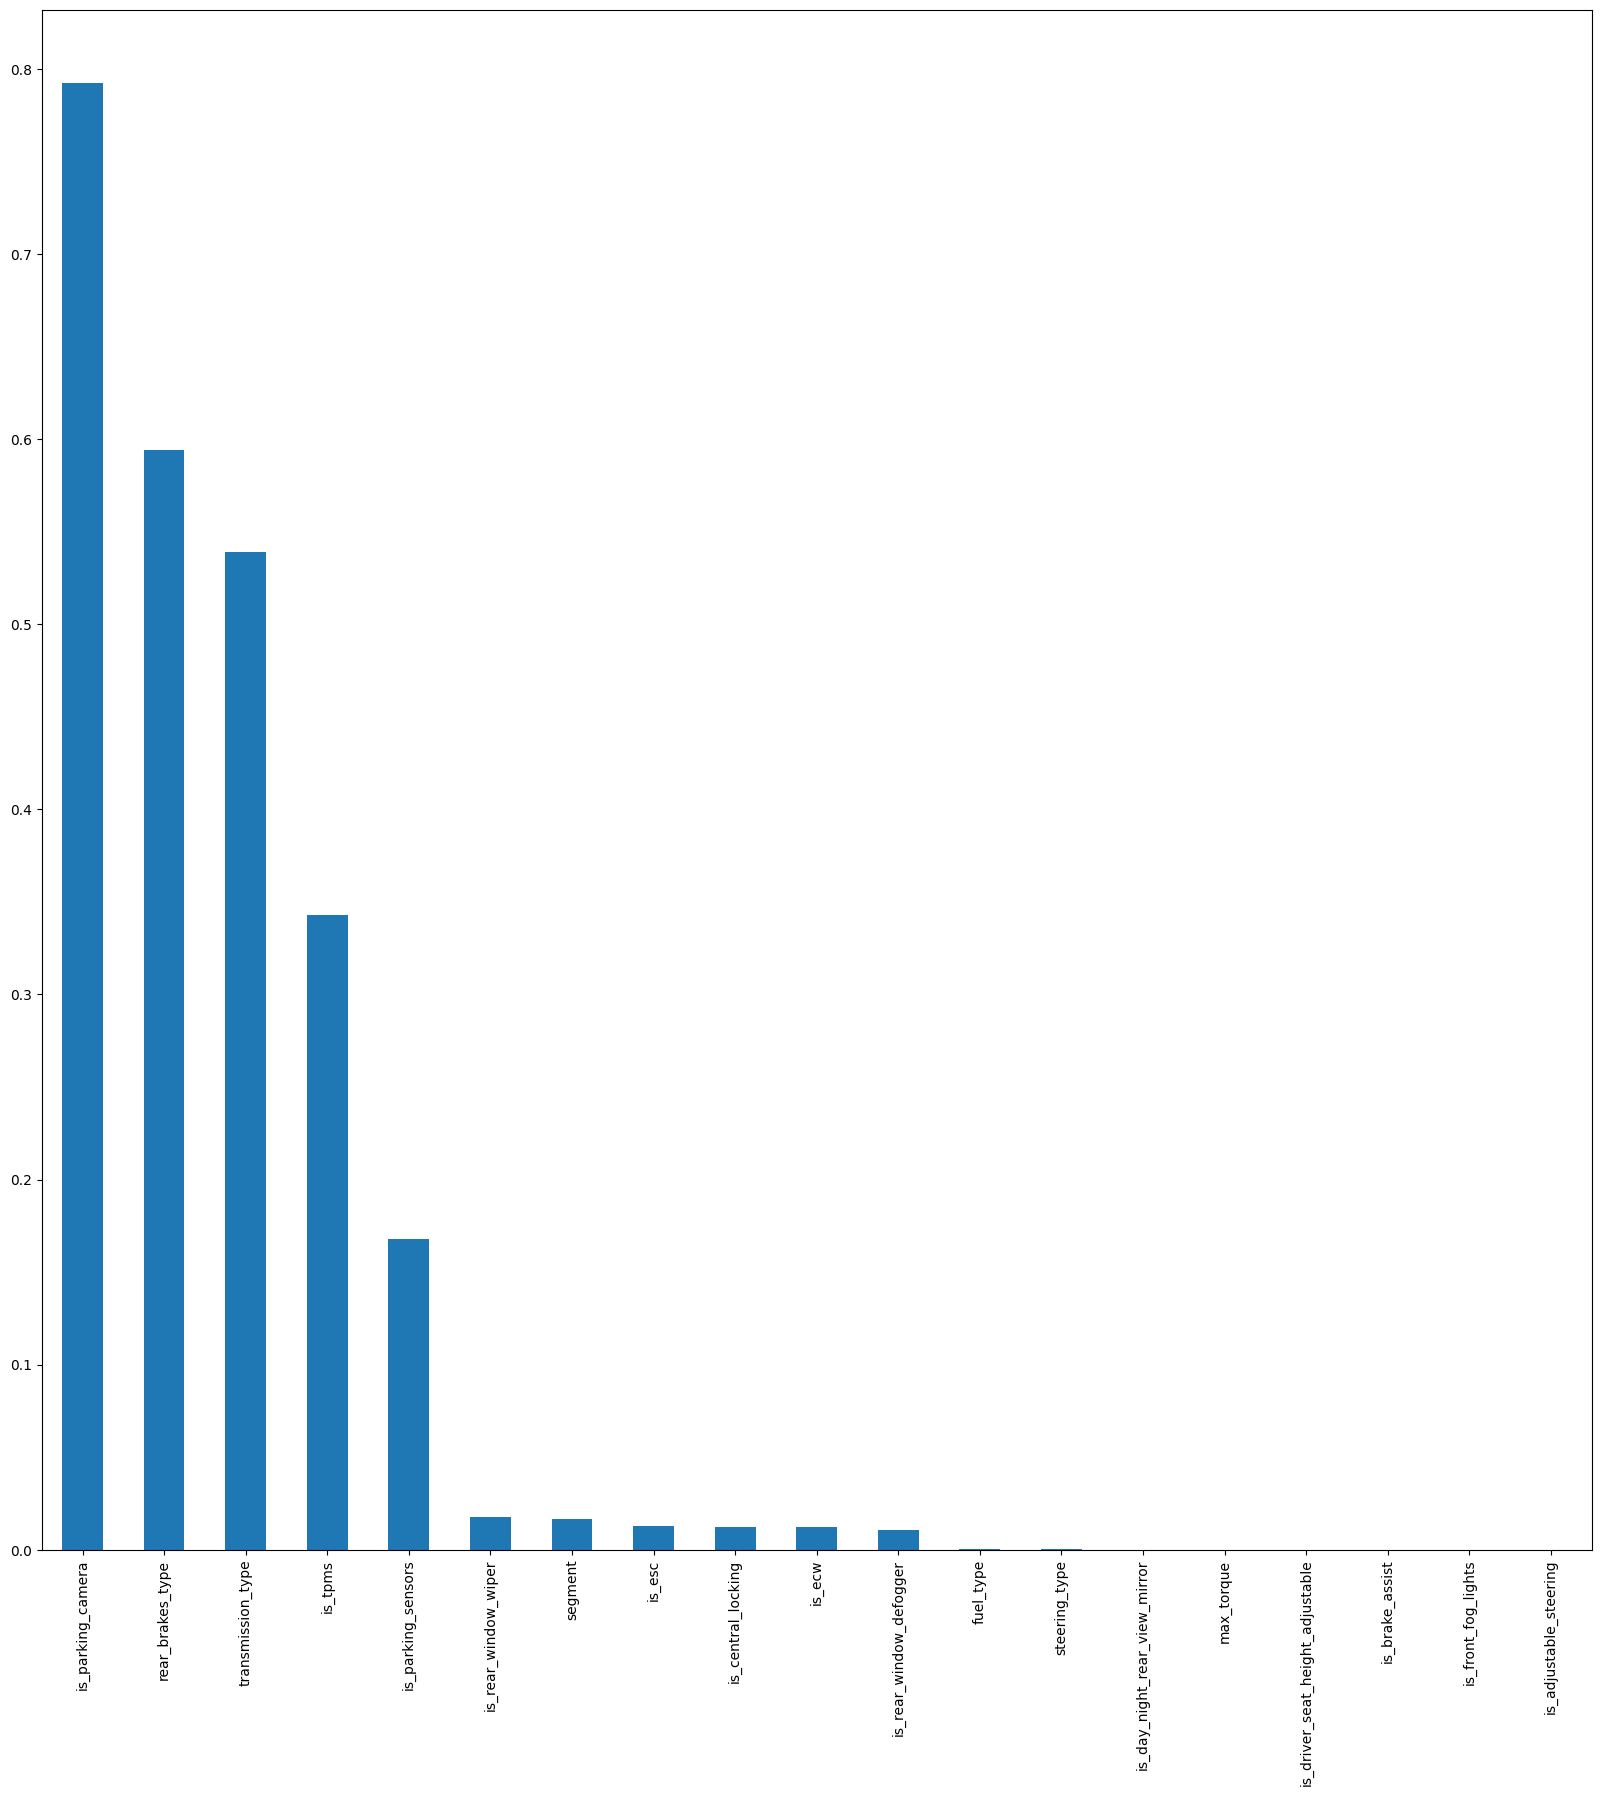

In [42]:
chi_plot(ros_train, categorical_features, y_ros)

***Insight***

- The unsampled and undersampled categorical features had similar feature importances.
- The oversampled set however, had less prominent features with importance. 
- However, among the three sets, three features were prominent with high importance, these features are `is_parking_camera`, `rear_brakes_type` and `transmission_type`.
- Create categorical feature selection variables for each set using respective thresholds.

In [43]:
#for unsampled set
un_cat = ['rear_brakes_type', 'transmission_type', 'is_tpms', 'is_parking_camera', 'is_parking_sensors', 'is_rear_window_defogger', 'is_rear_window_wiper', 'is_esc'] 

#for undersampled set
under_cat = ['transmission_type','rear_brakes_type', 'is_parking_camera', 'is_tpms', 'is_parking_sensors','is_rear_window_wiper', 'is_rear_window_defogger'] 

#for the oversampled set
over_cat = ['is_parking_camera', 'rear_brakes_type', 'transmission_type']

### 7.2) Numerical Feature selection

- The F-Classification and Mutual information methods will be used for numerical feature importance
- These methods will also be implemeted on the various splits


In [44]:
from sklearn.feature_selection import SelectKBest

#### 7.2.1) F-Classification feature selection

In [45]:
def f_selection(df, features, y, string):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(df[features], y)
    fs_dict = dict(zip(df[features].columns.to_list(), fs.scores_))

    plt.figure(figsize=(30,20))
    plt.bar(list(fs_dict.keys()), fs_dict.values(), color='grey')
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title(string)
    plt.show()

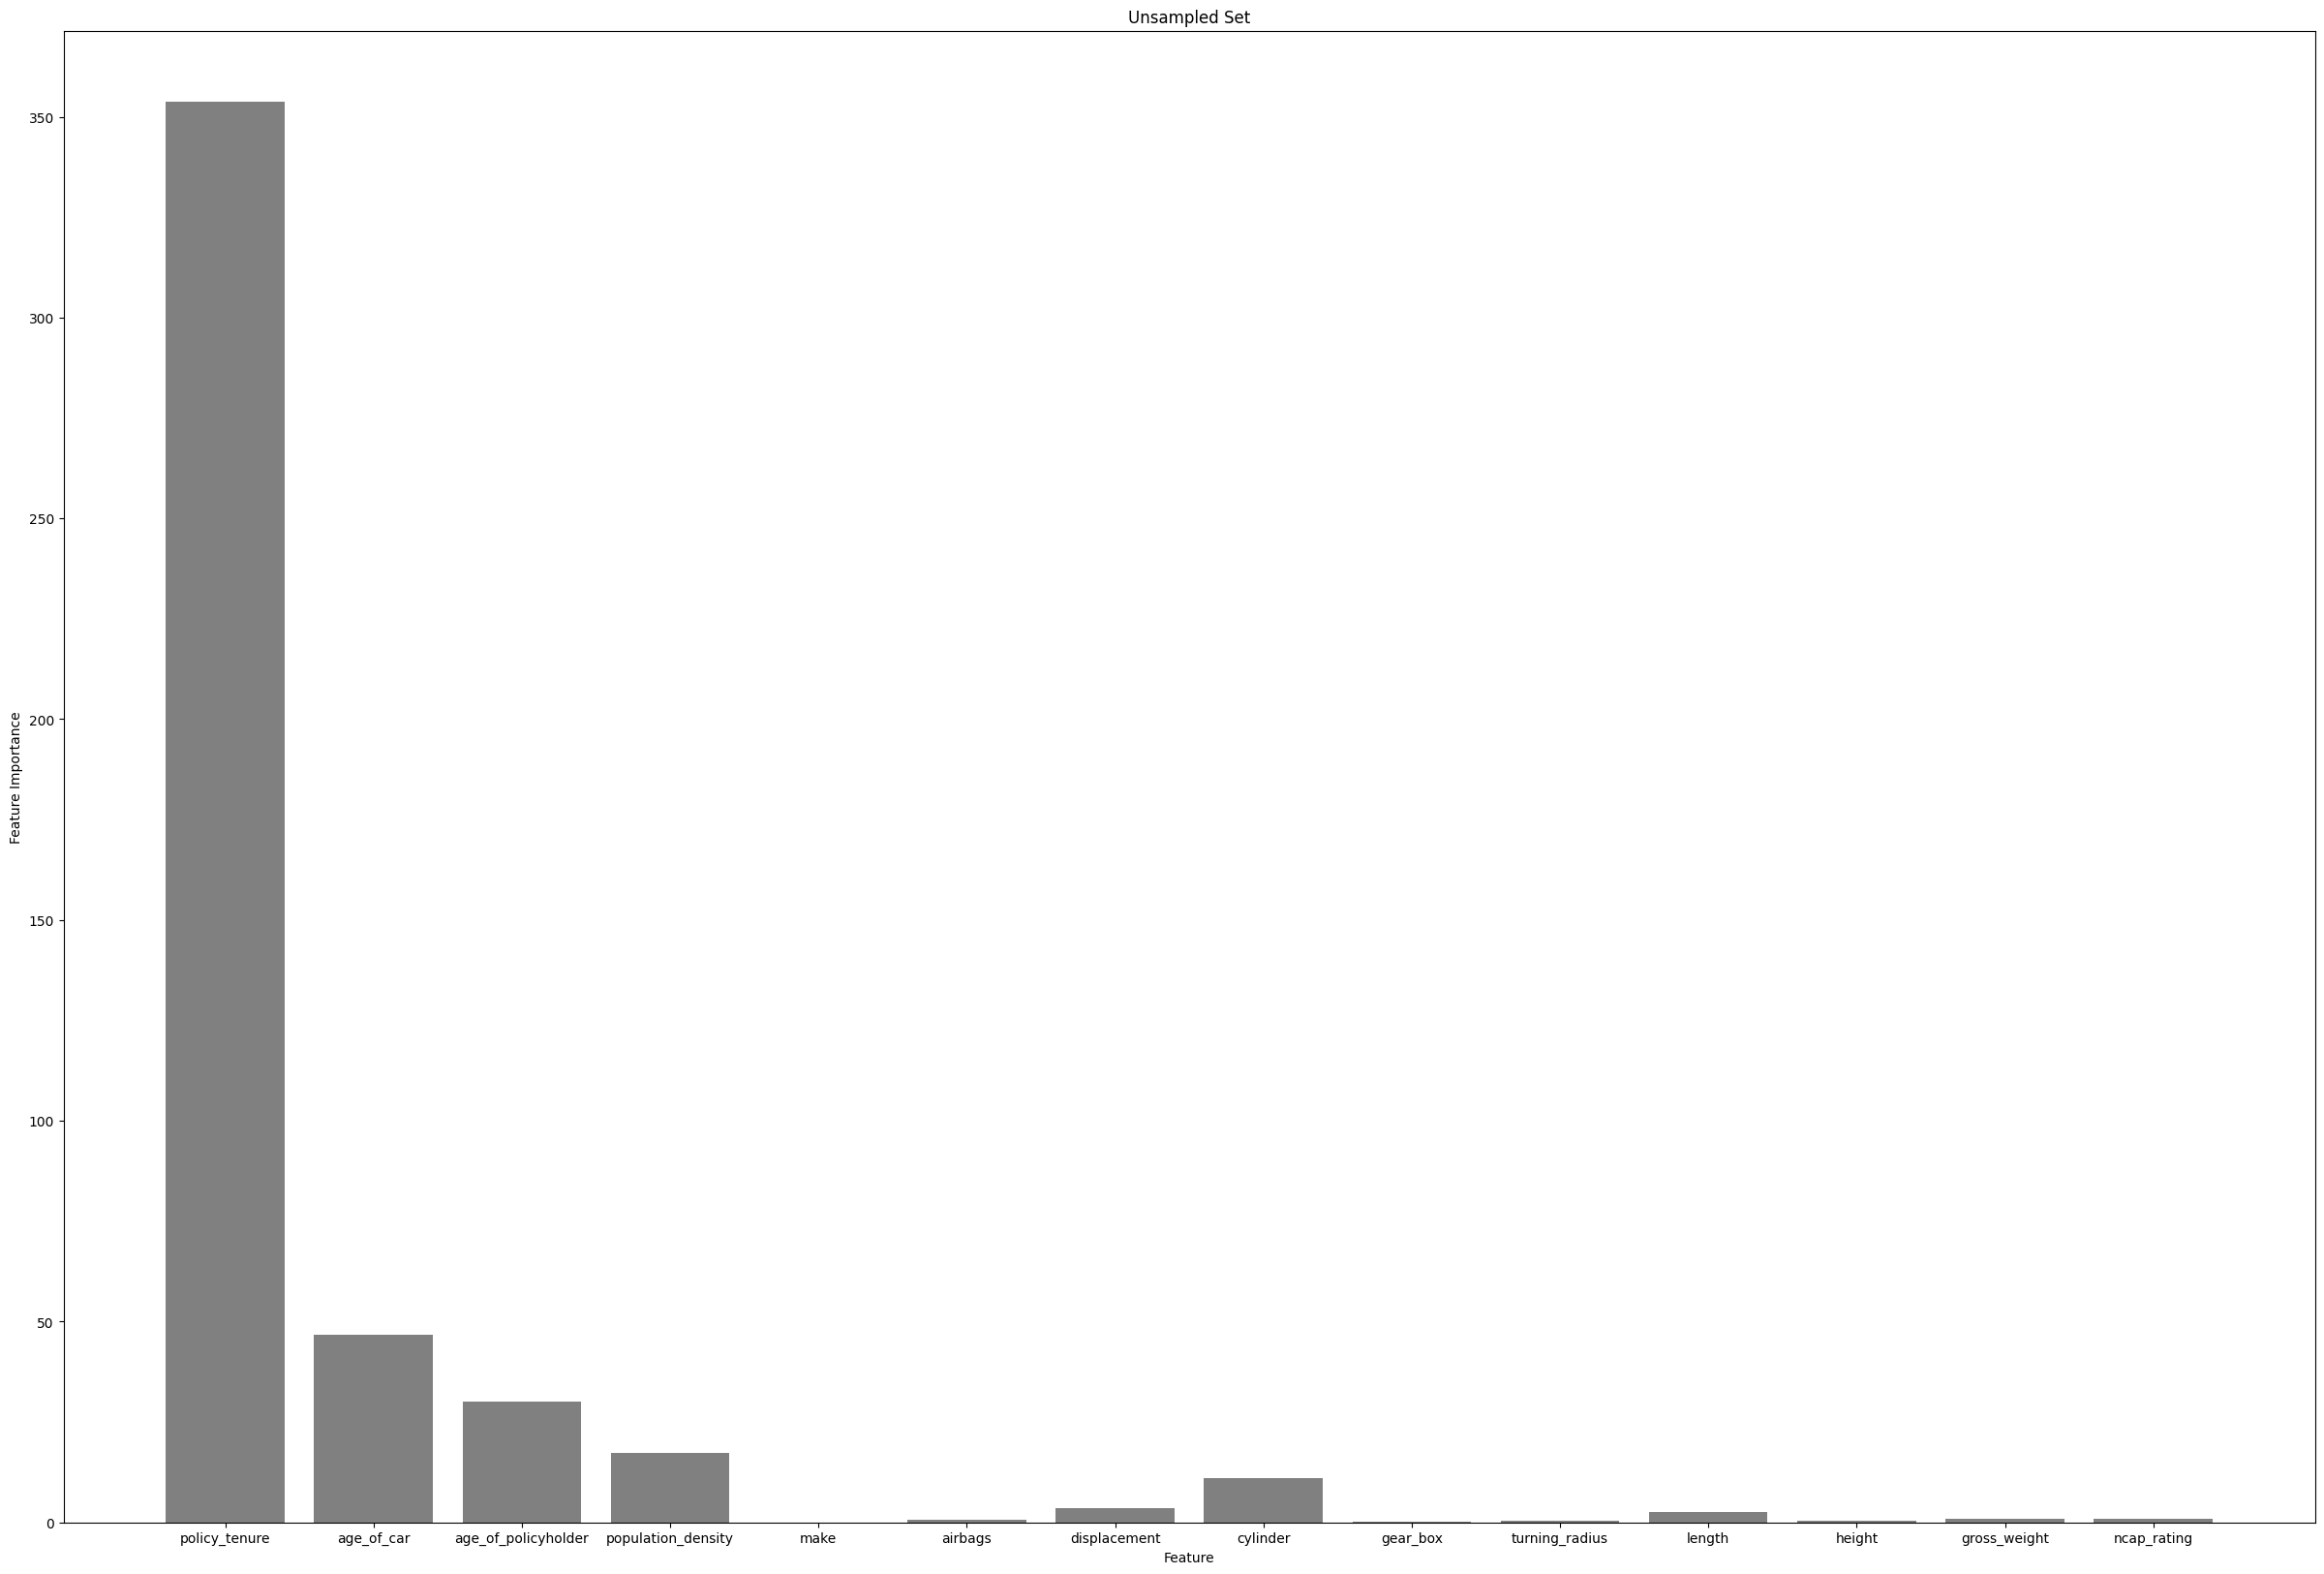

In [46]:
f_selection(new_train, numerical_features, y_train, 'Unsampled Set')

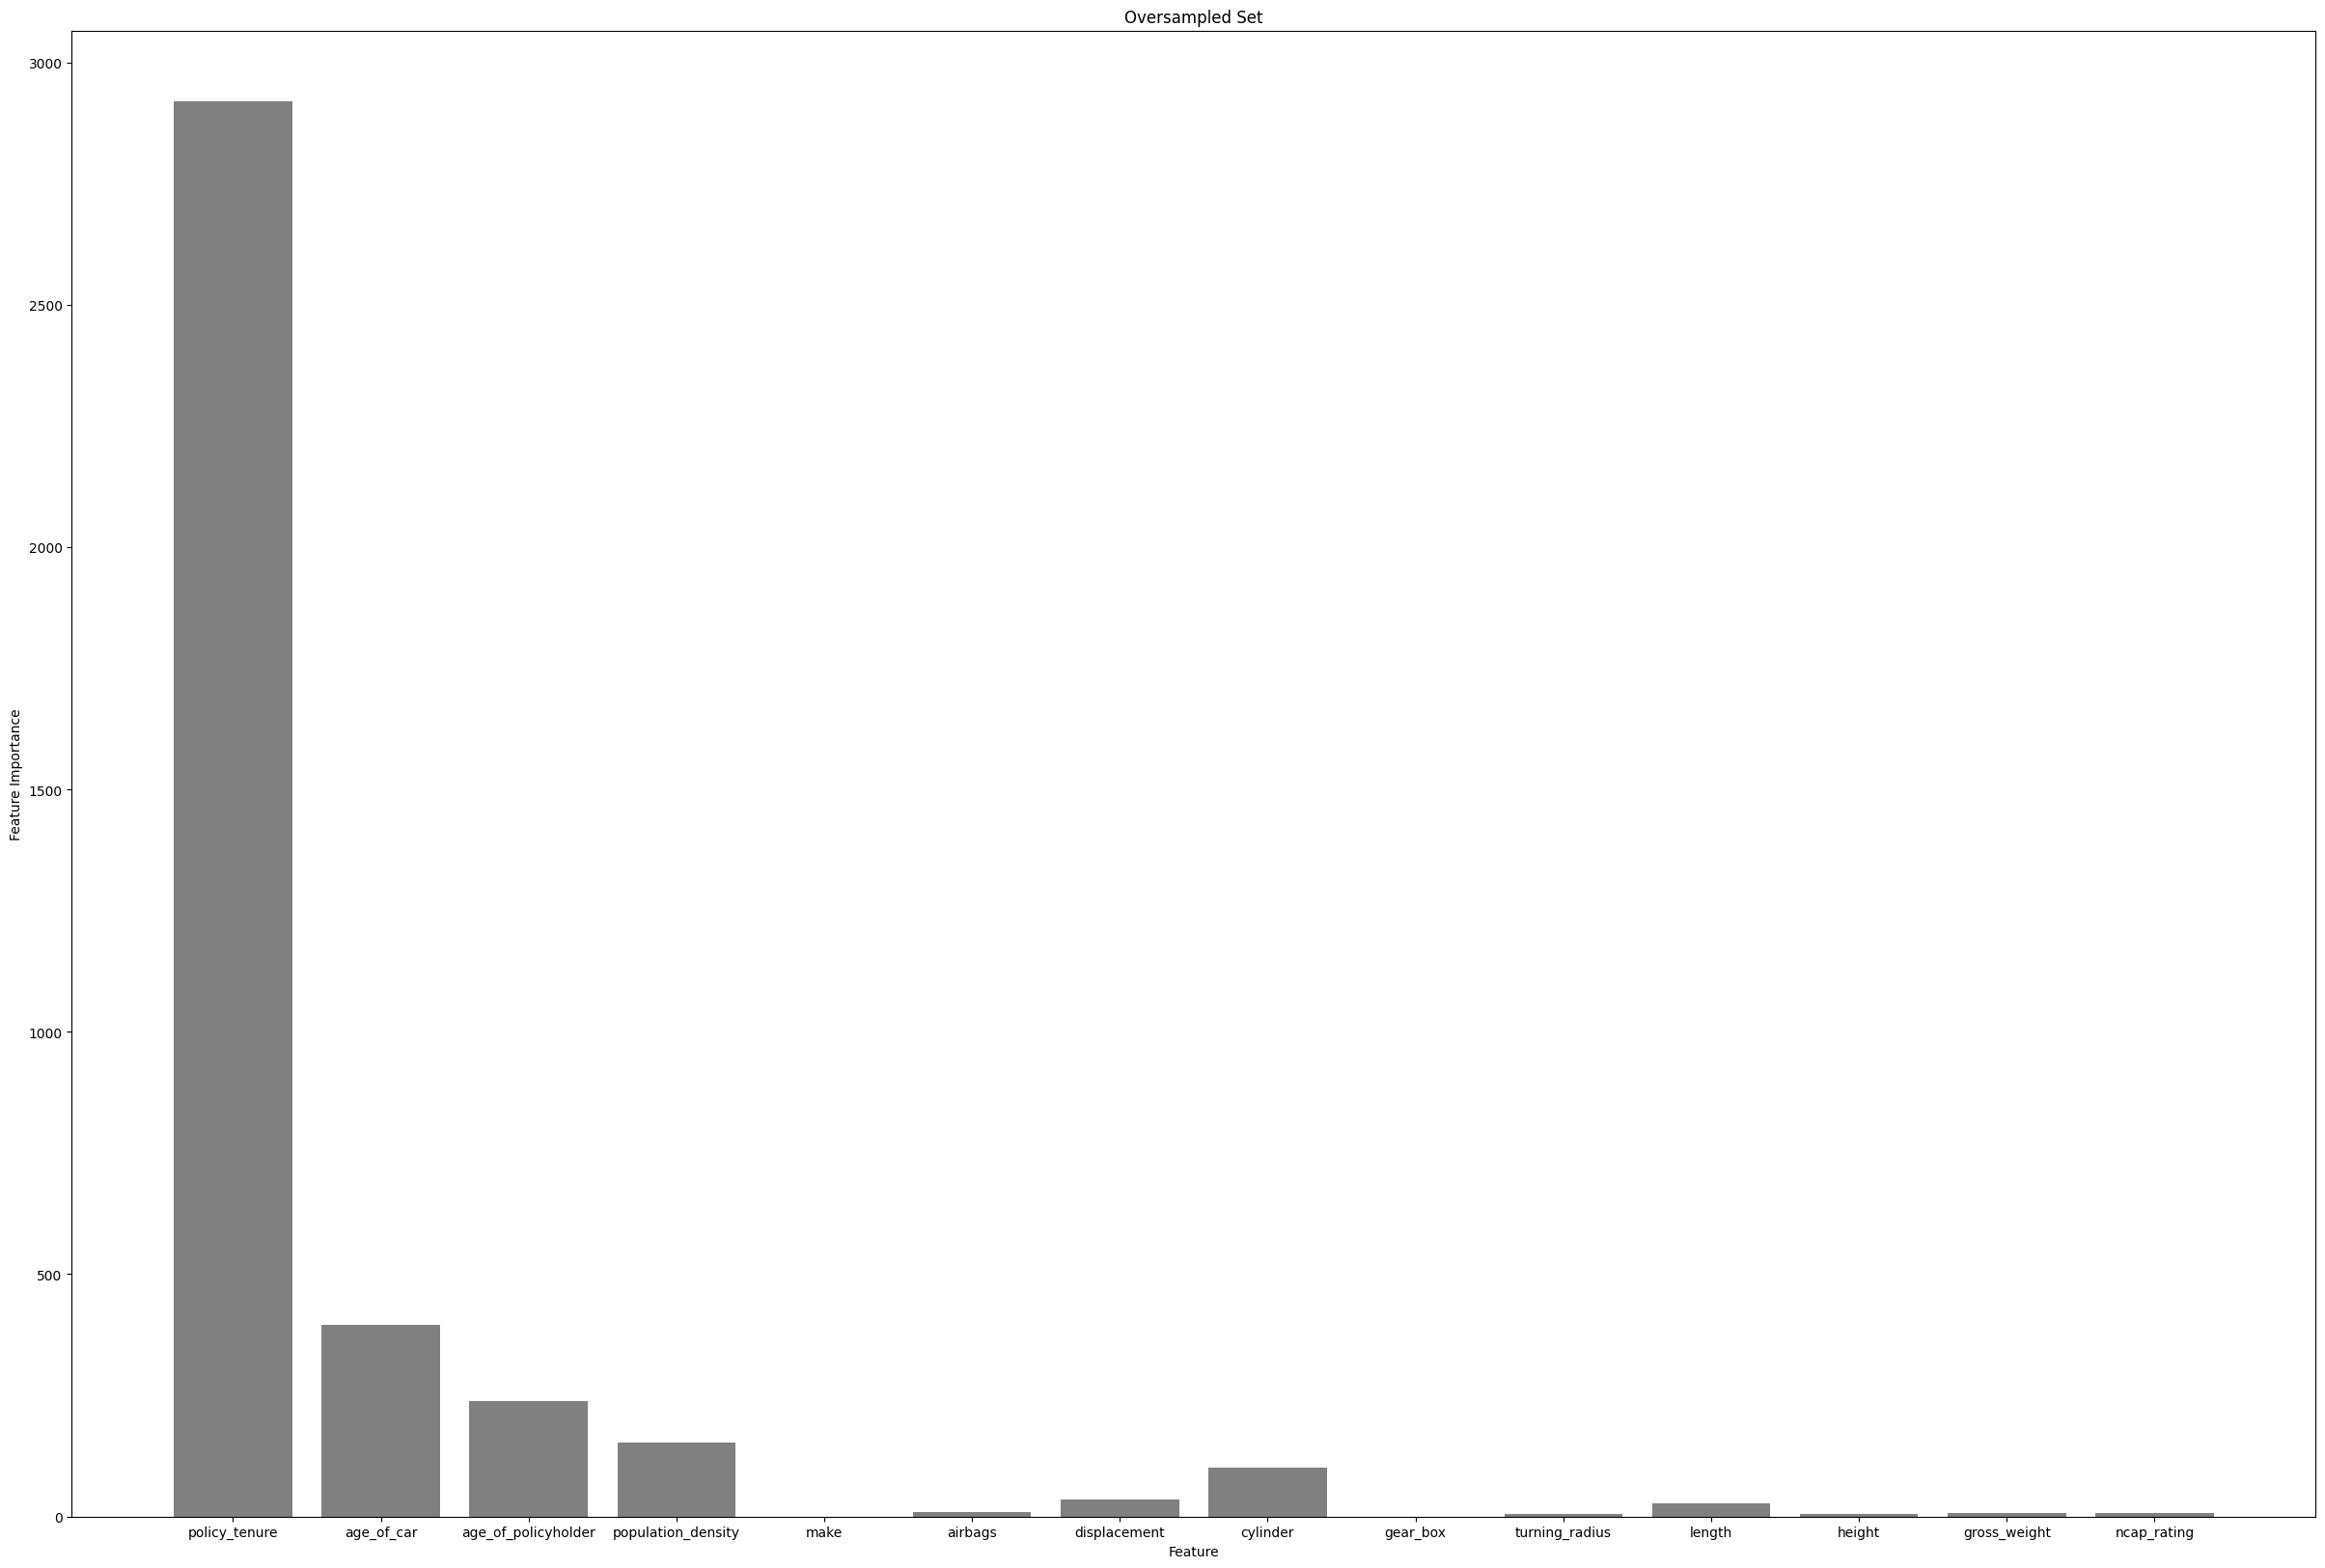

In [47]:
f_selection(ros_train, numerical_features, y_ros, 'Oversampled Set')

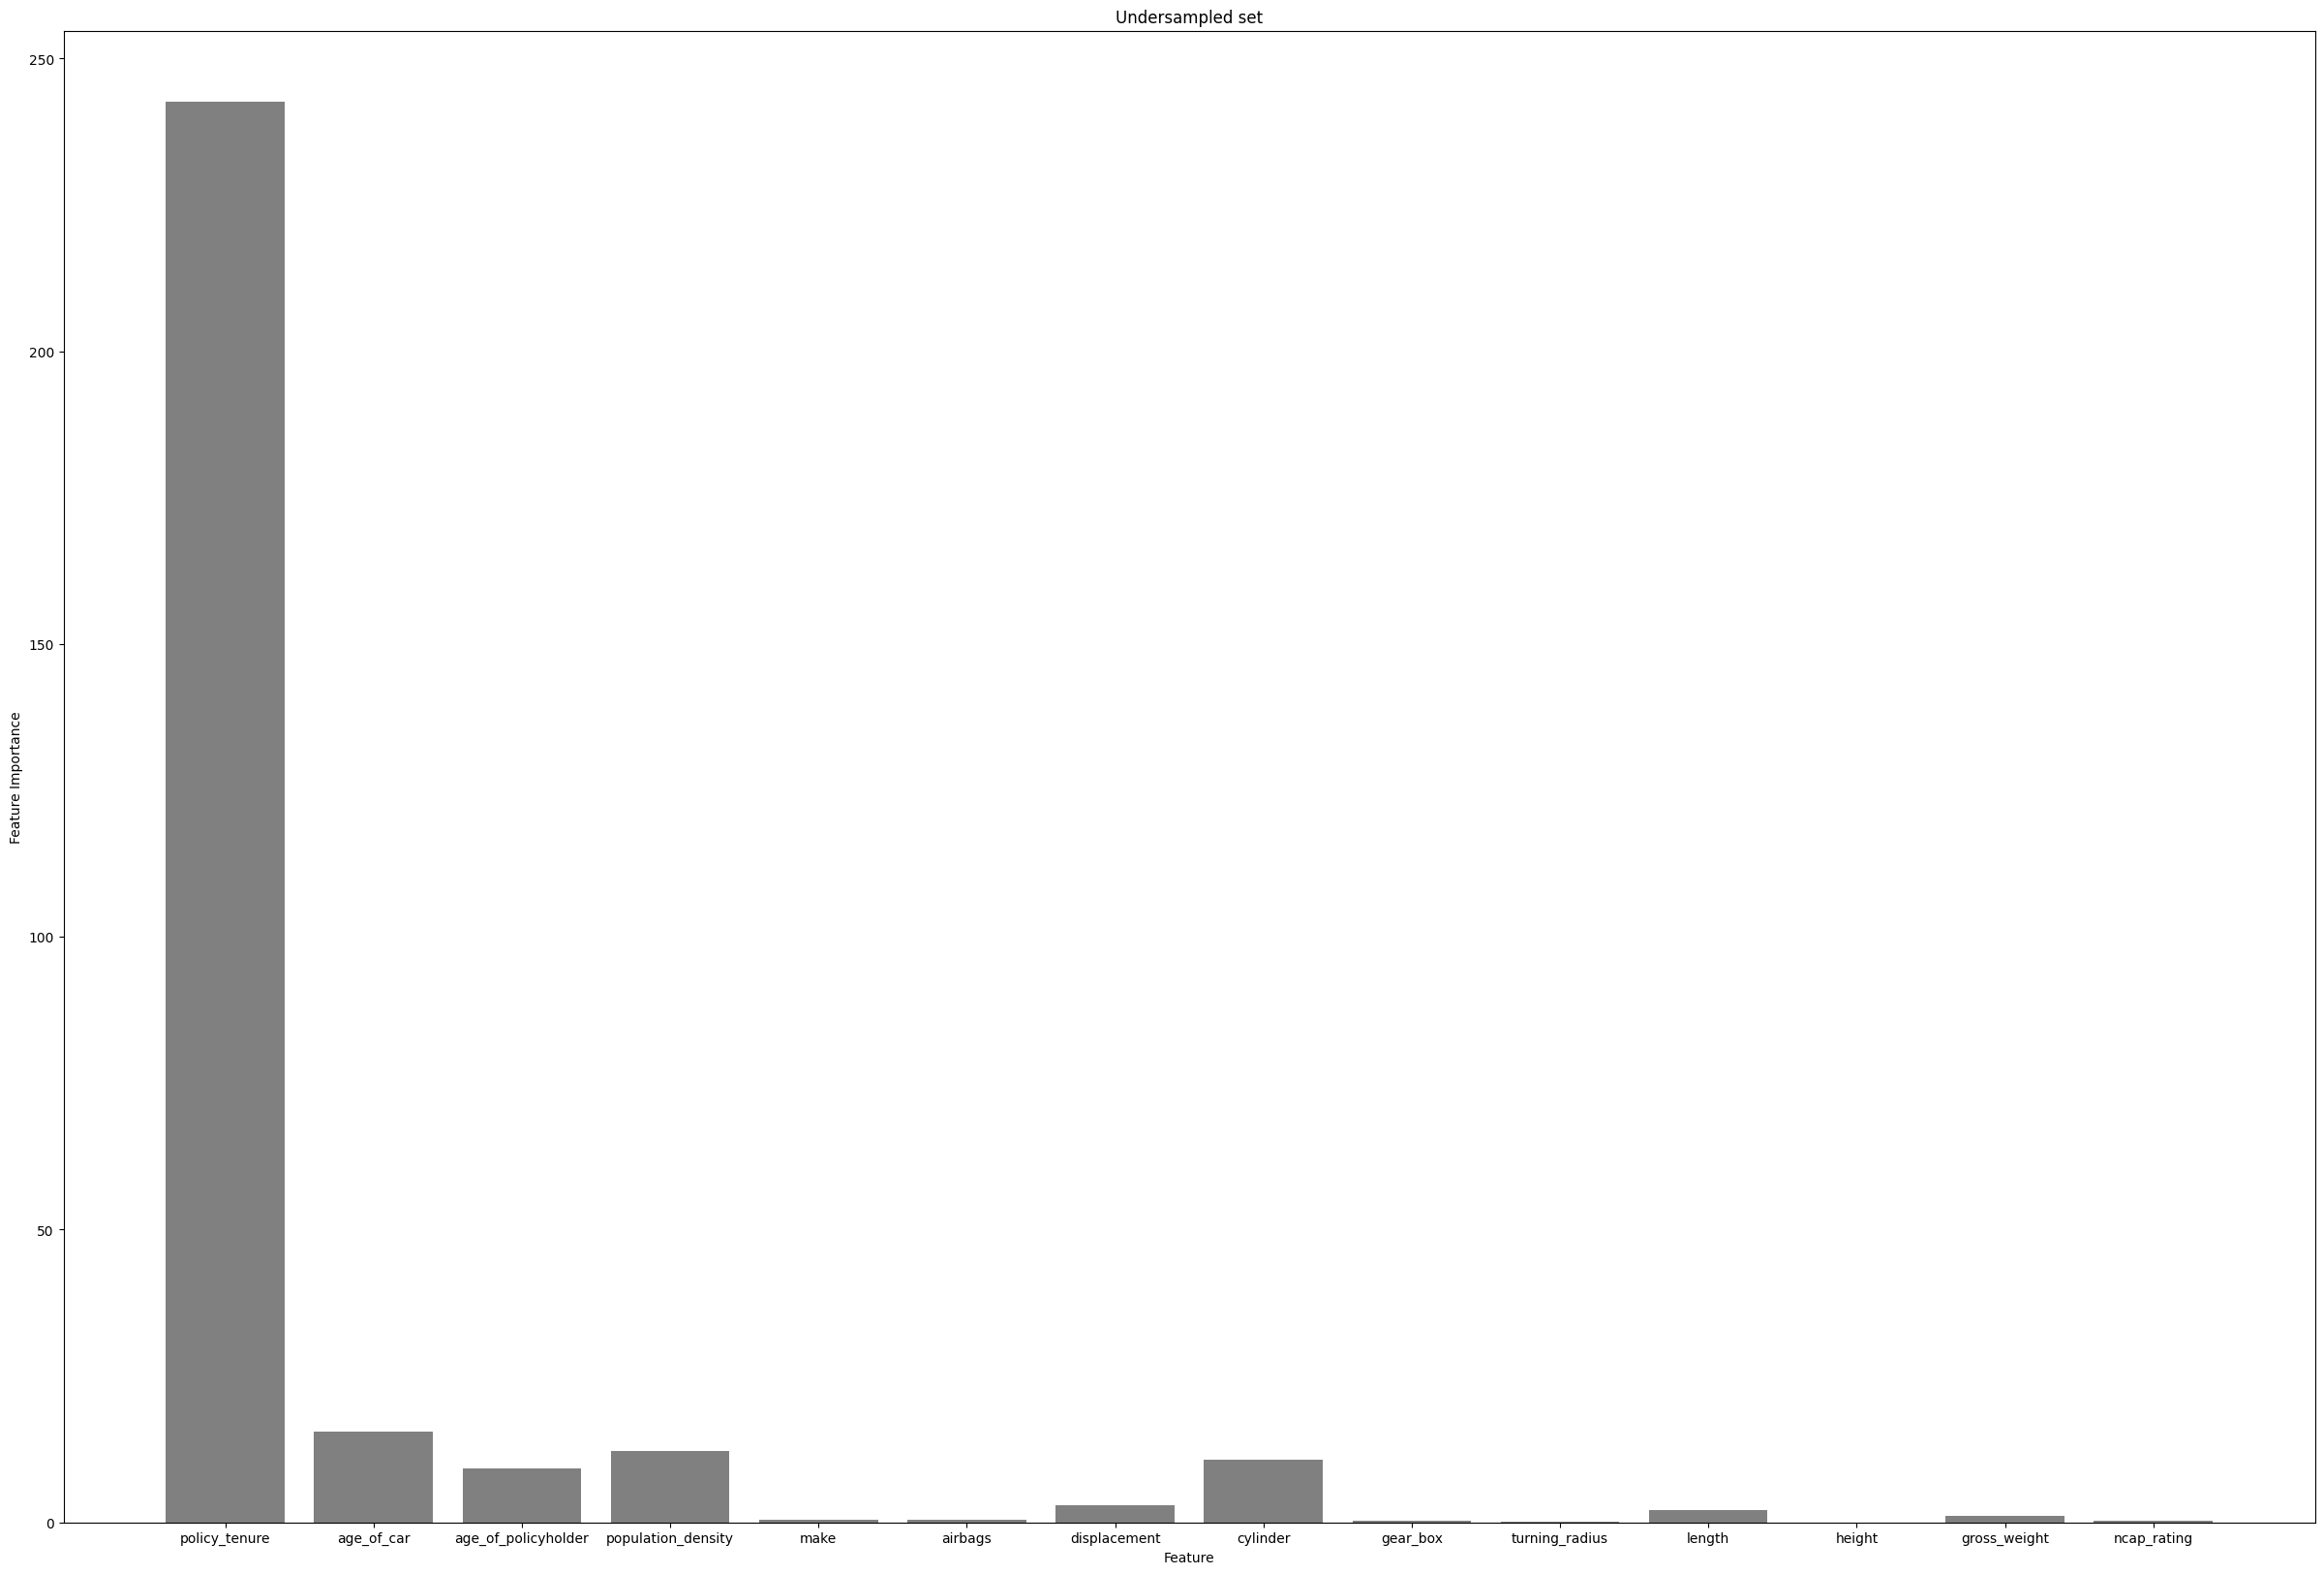

In [48]:
f_selection(rus_train, numerical_features, y_rus, 'Undersampled set')

***Insight***

- The `policy_tenure` feature had the most significant importance in all the sets.
- Aside the aforementioned feature, there were four other features with quite some importance. These features namely; `age_of_car`, `age_of_policyholder`, `population_density` and `cylinder`.
- The unsampled and oversampled sets had the same order of feature importance.
- The undersamped set however had a slightly different order.
- Since the top 5 features were common for the f-selection method, create a general list to represent these features.

In [49]:
num_f_classif = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder']

#### 7.2.2) Mutual Information feature selection

In [50]:
def mi_selection(df, features, y, string):
    mi = SelectKBest(score_func=mutual_info_classif, k='all')
    mi.fit(df[features], y)
    fs_dict = dict(zip(df[features].columns.to_list(), mi.scores_))

    plt.figure(figsize=(30,20))
    plt.bar(list(fs_dict.keys()), fs_dict.values(), color='blue')
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title(string)
    plt.show()

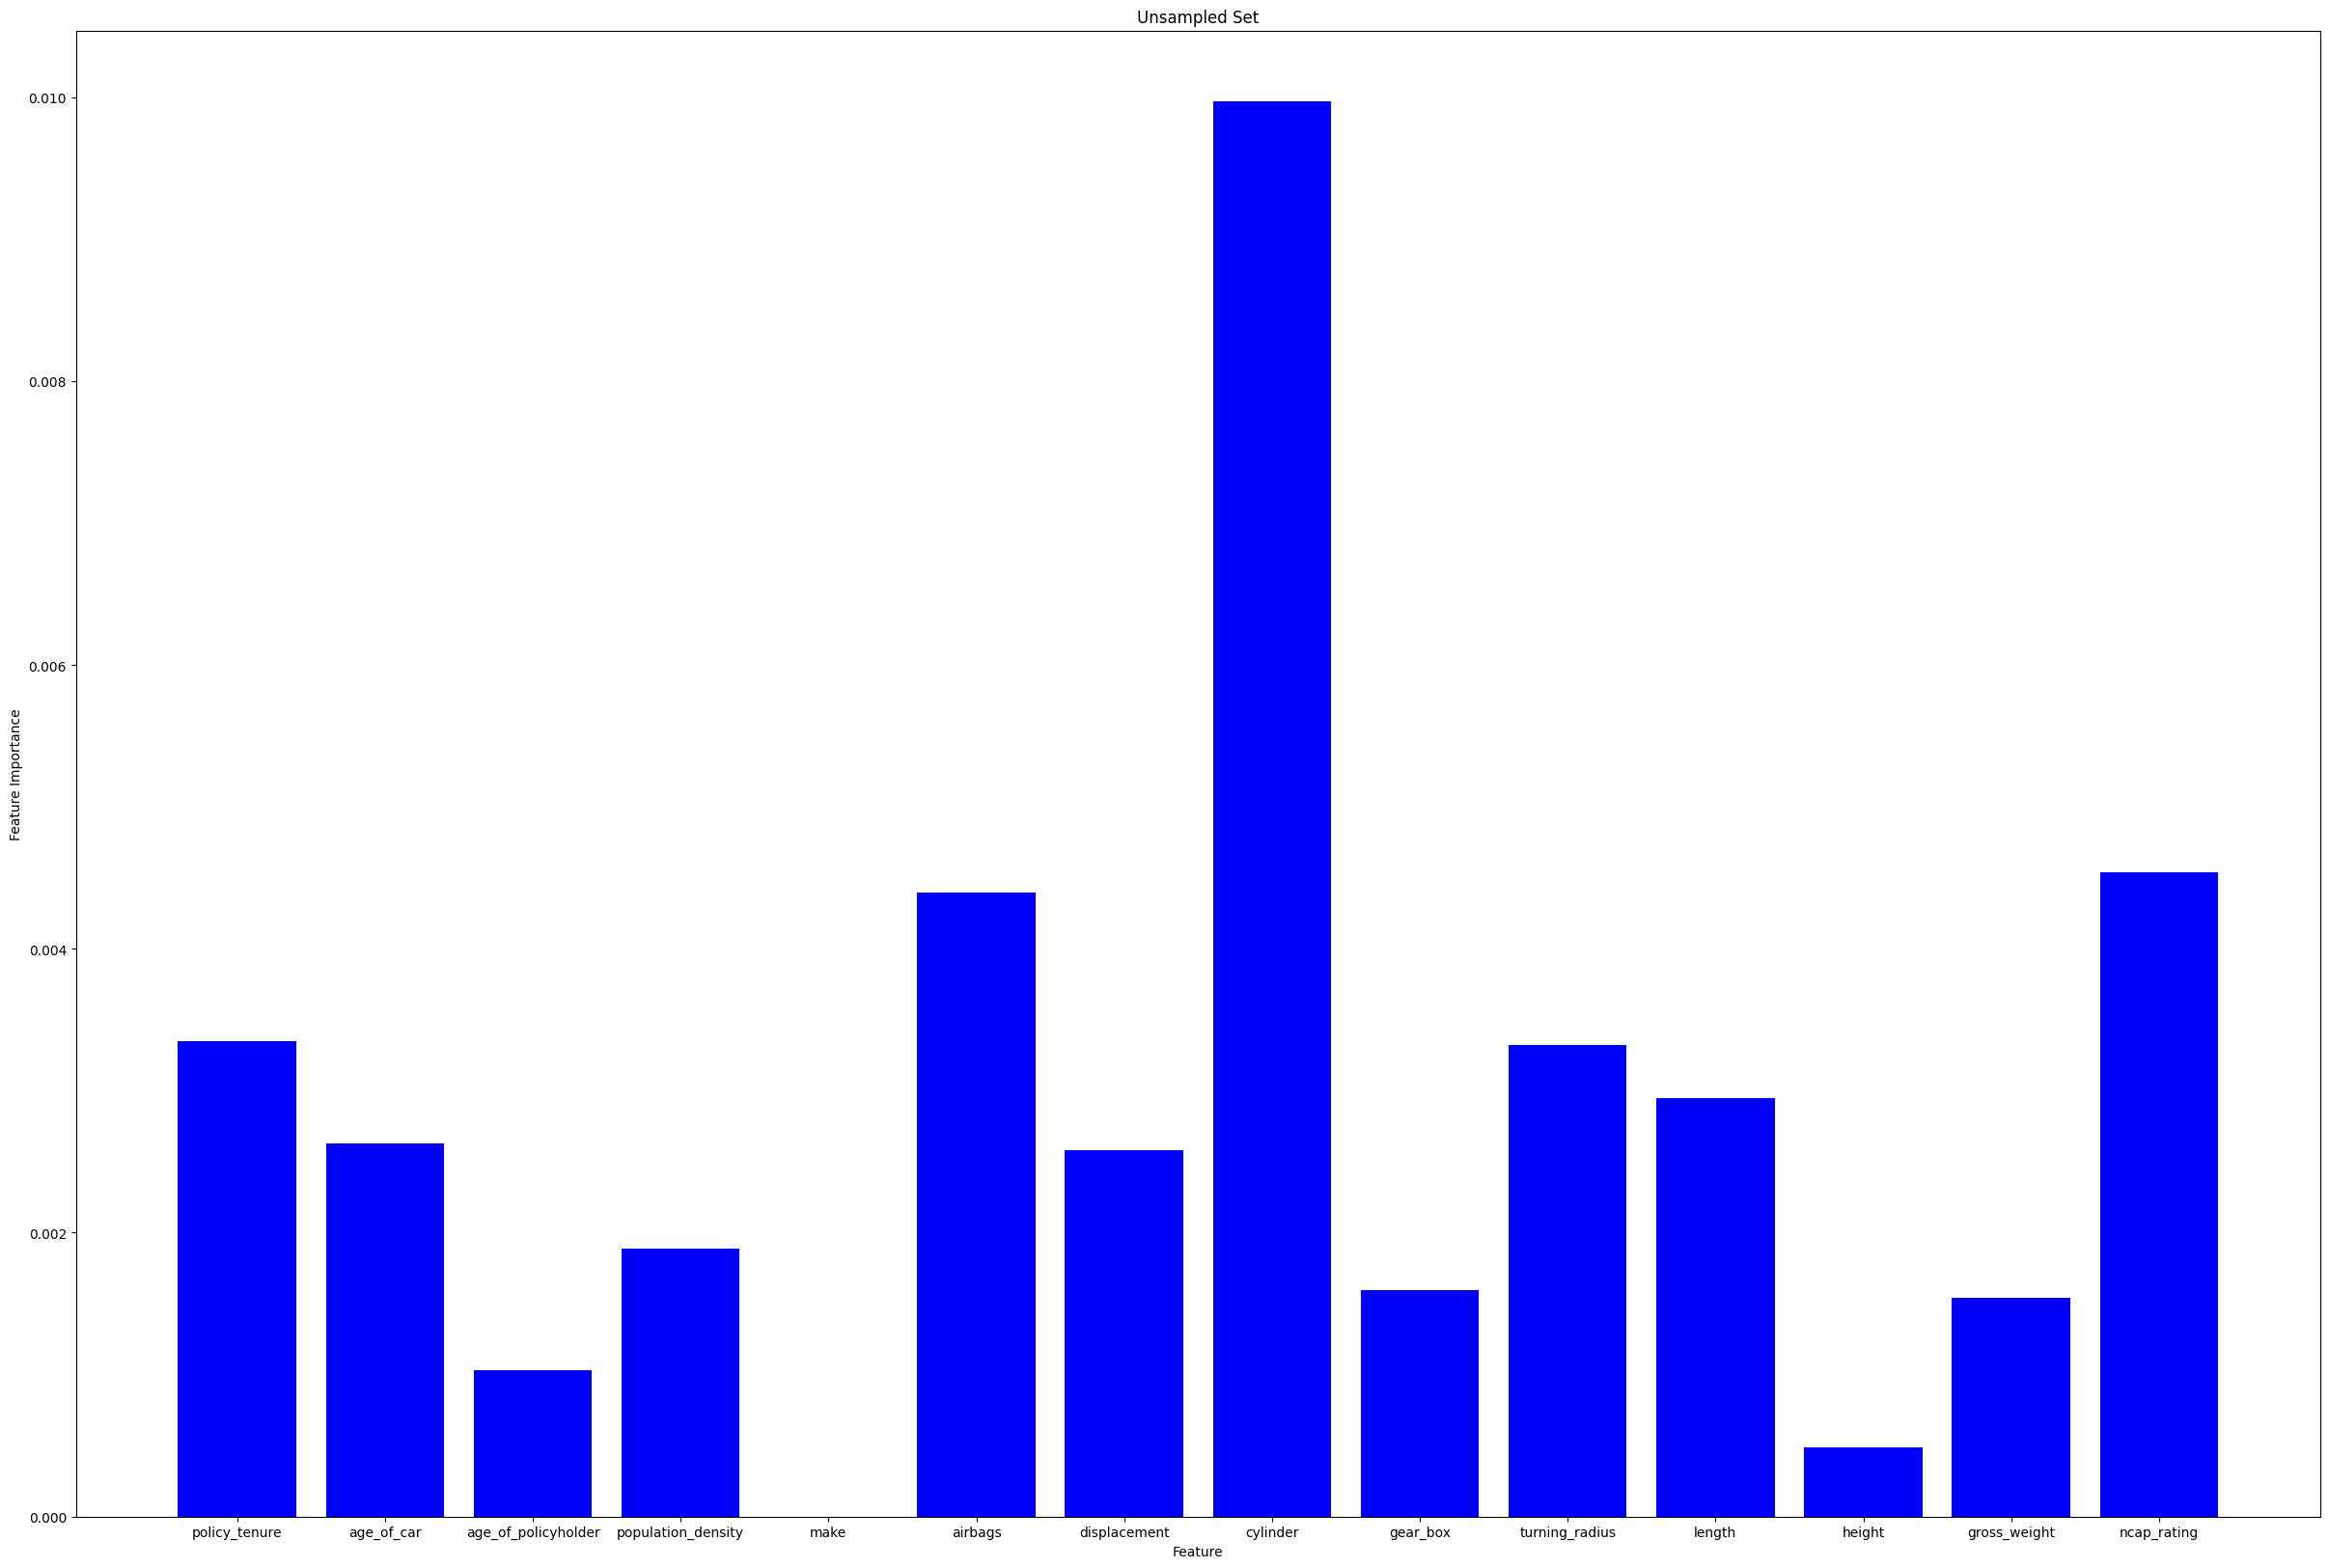

In [51]:
mi_selection(new_train, numerical_features, y_train, 'Unsampled Set')

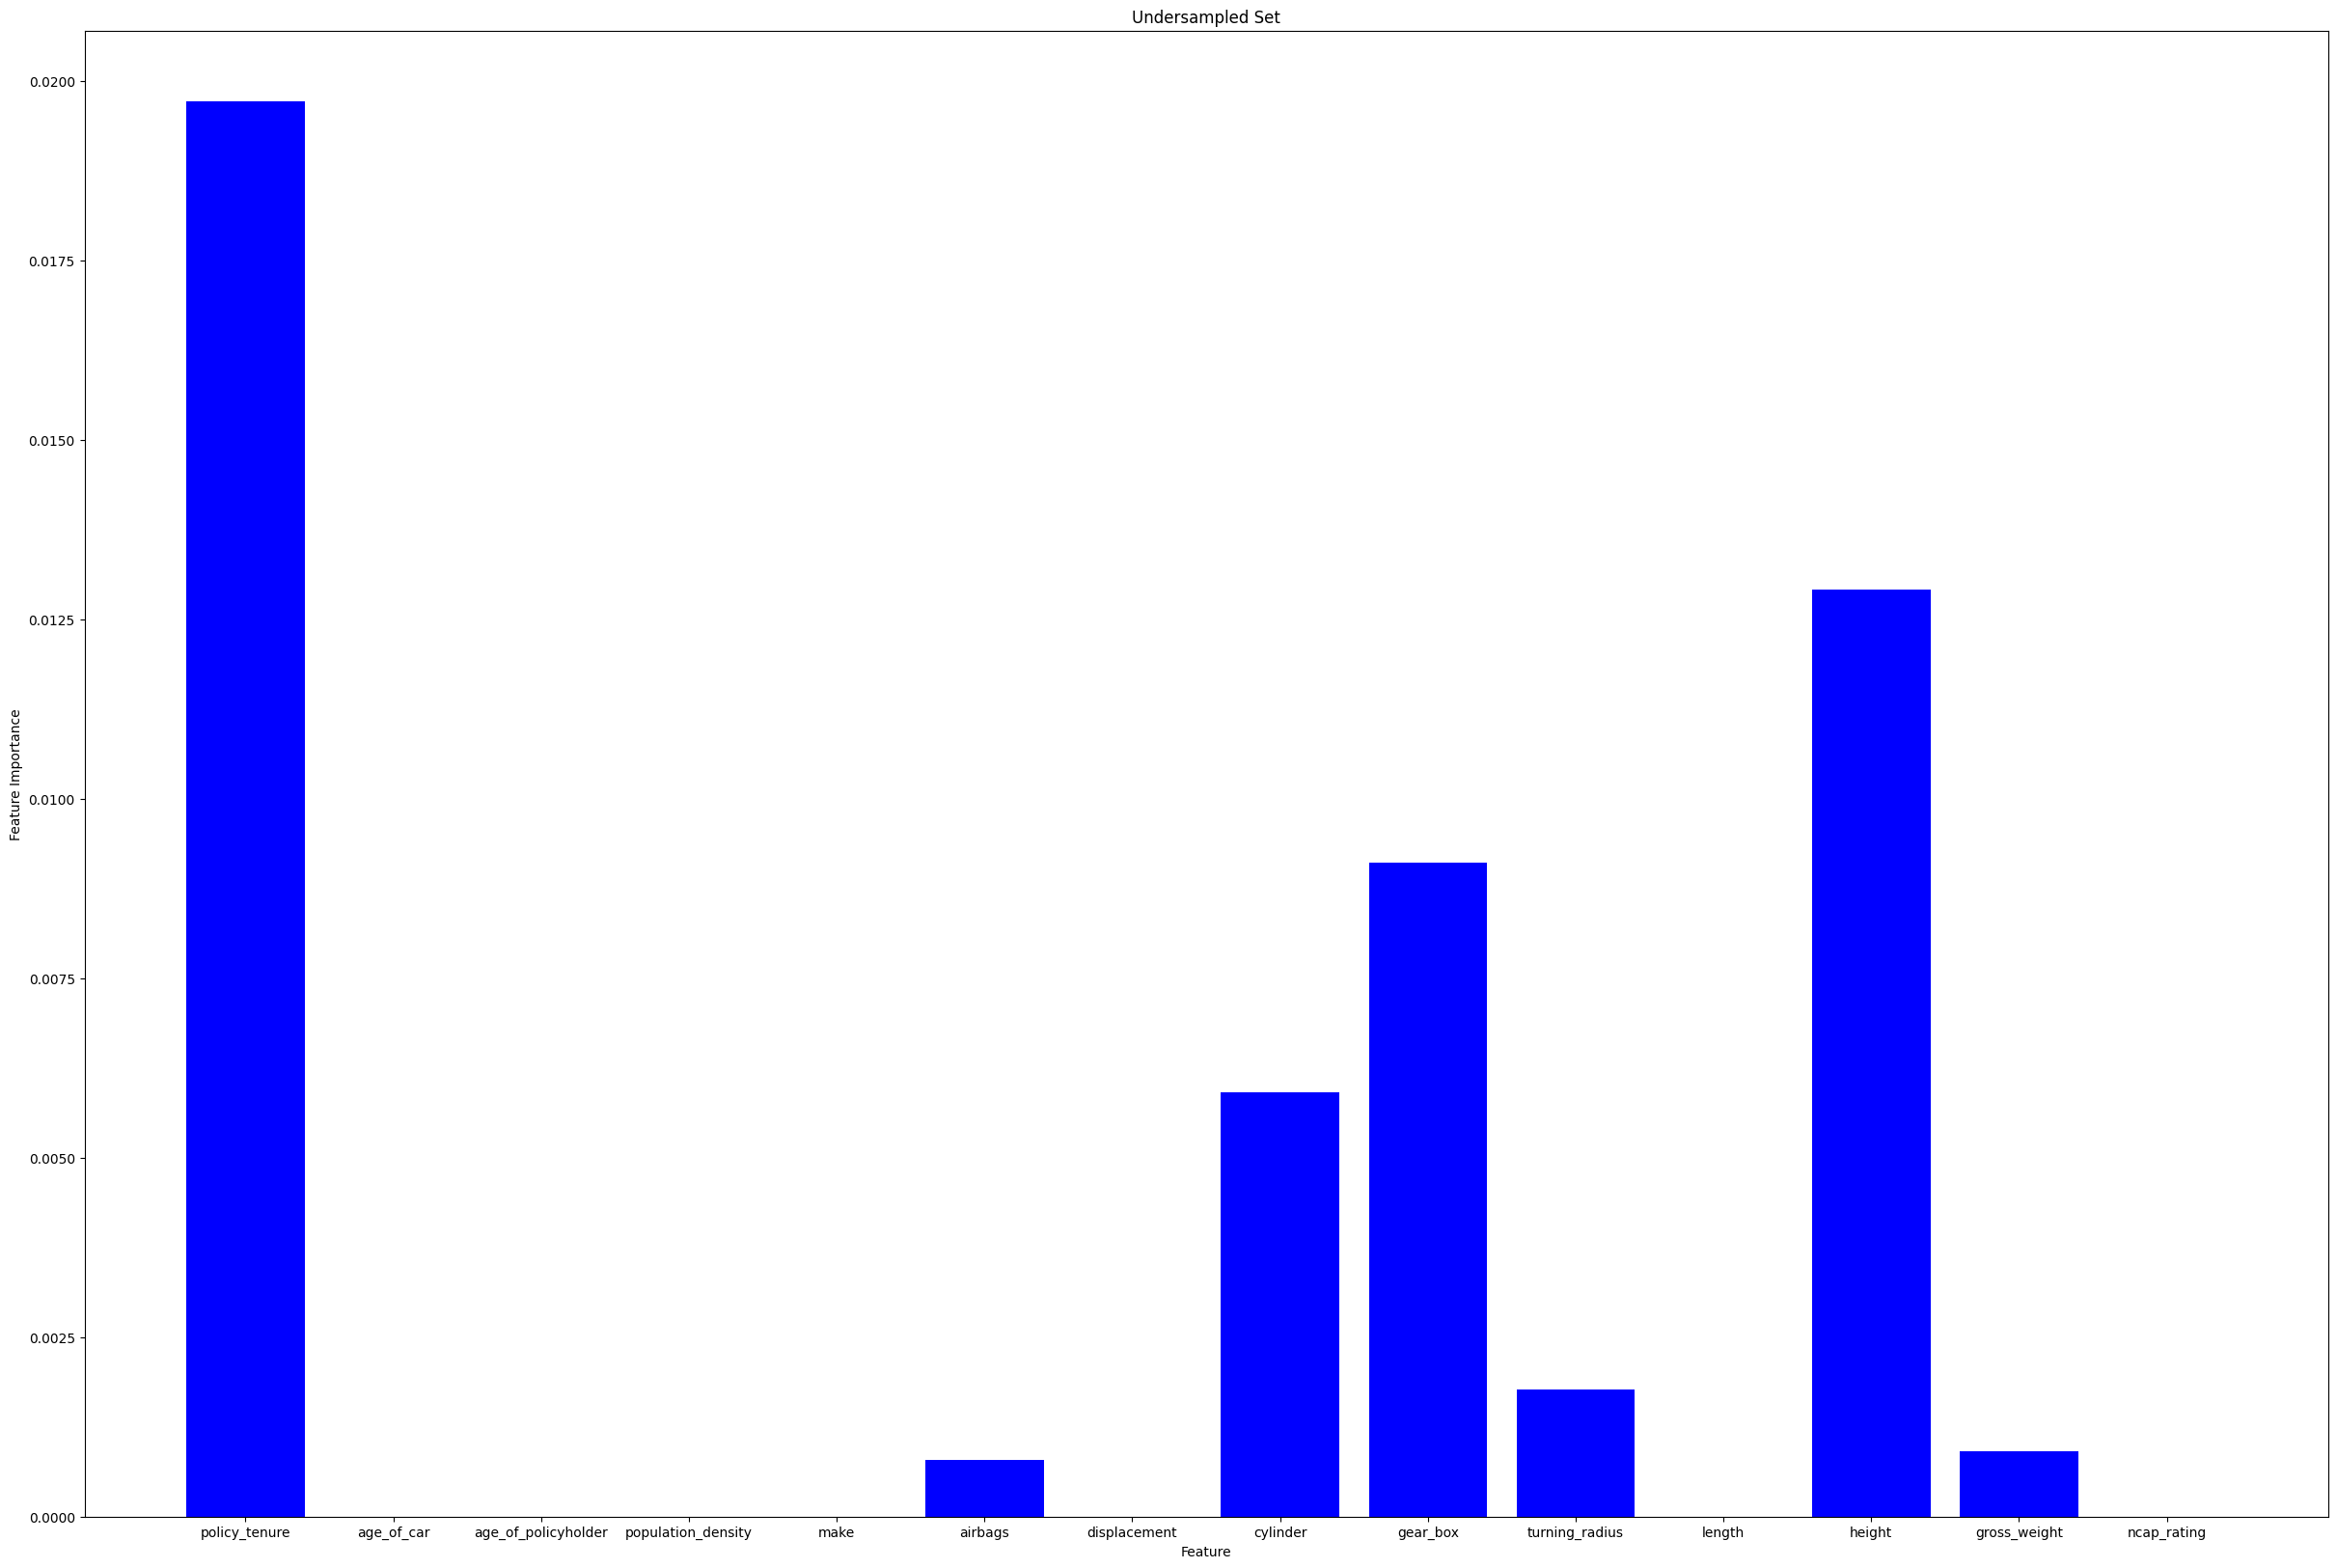

In [52]:
mi_selection(rus_train, numerical_features, y_rus, 'Undersampled Set')

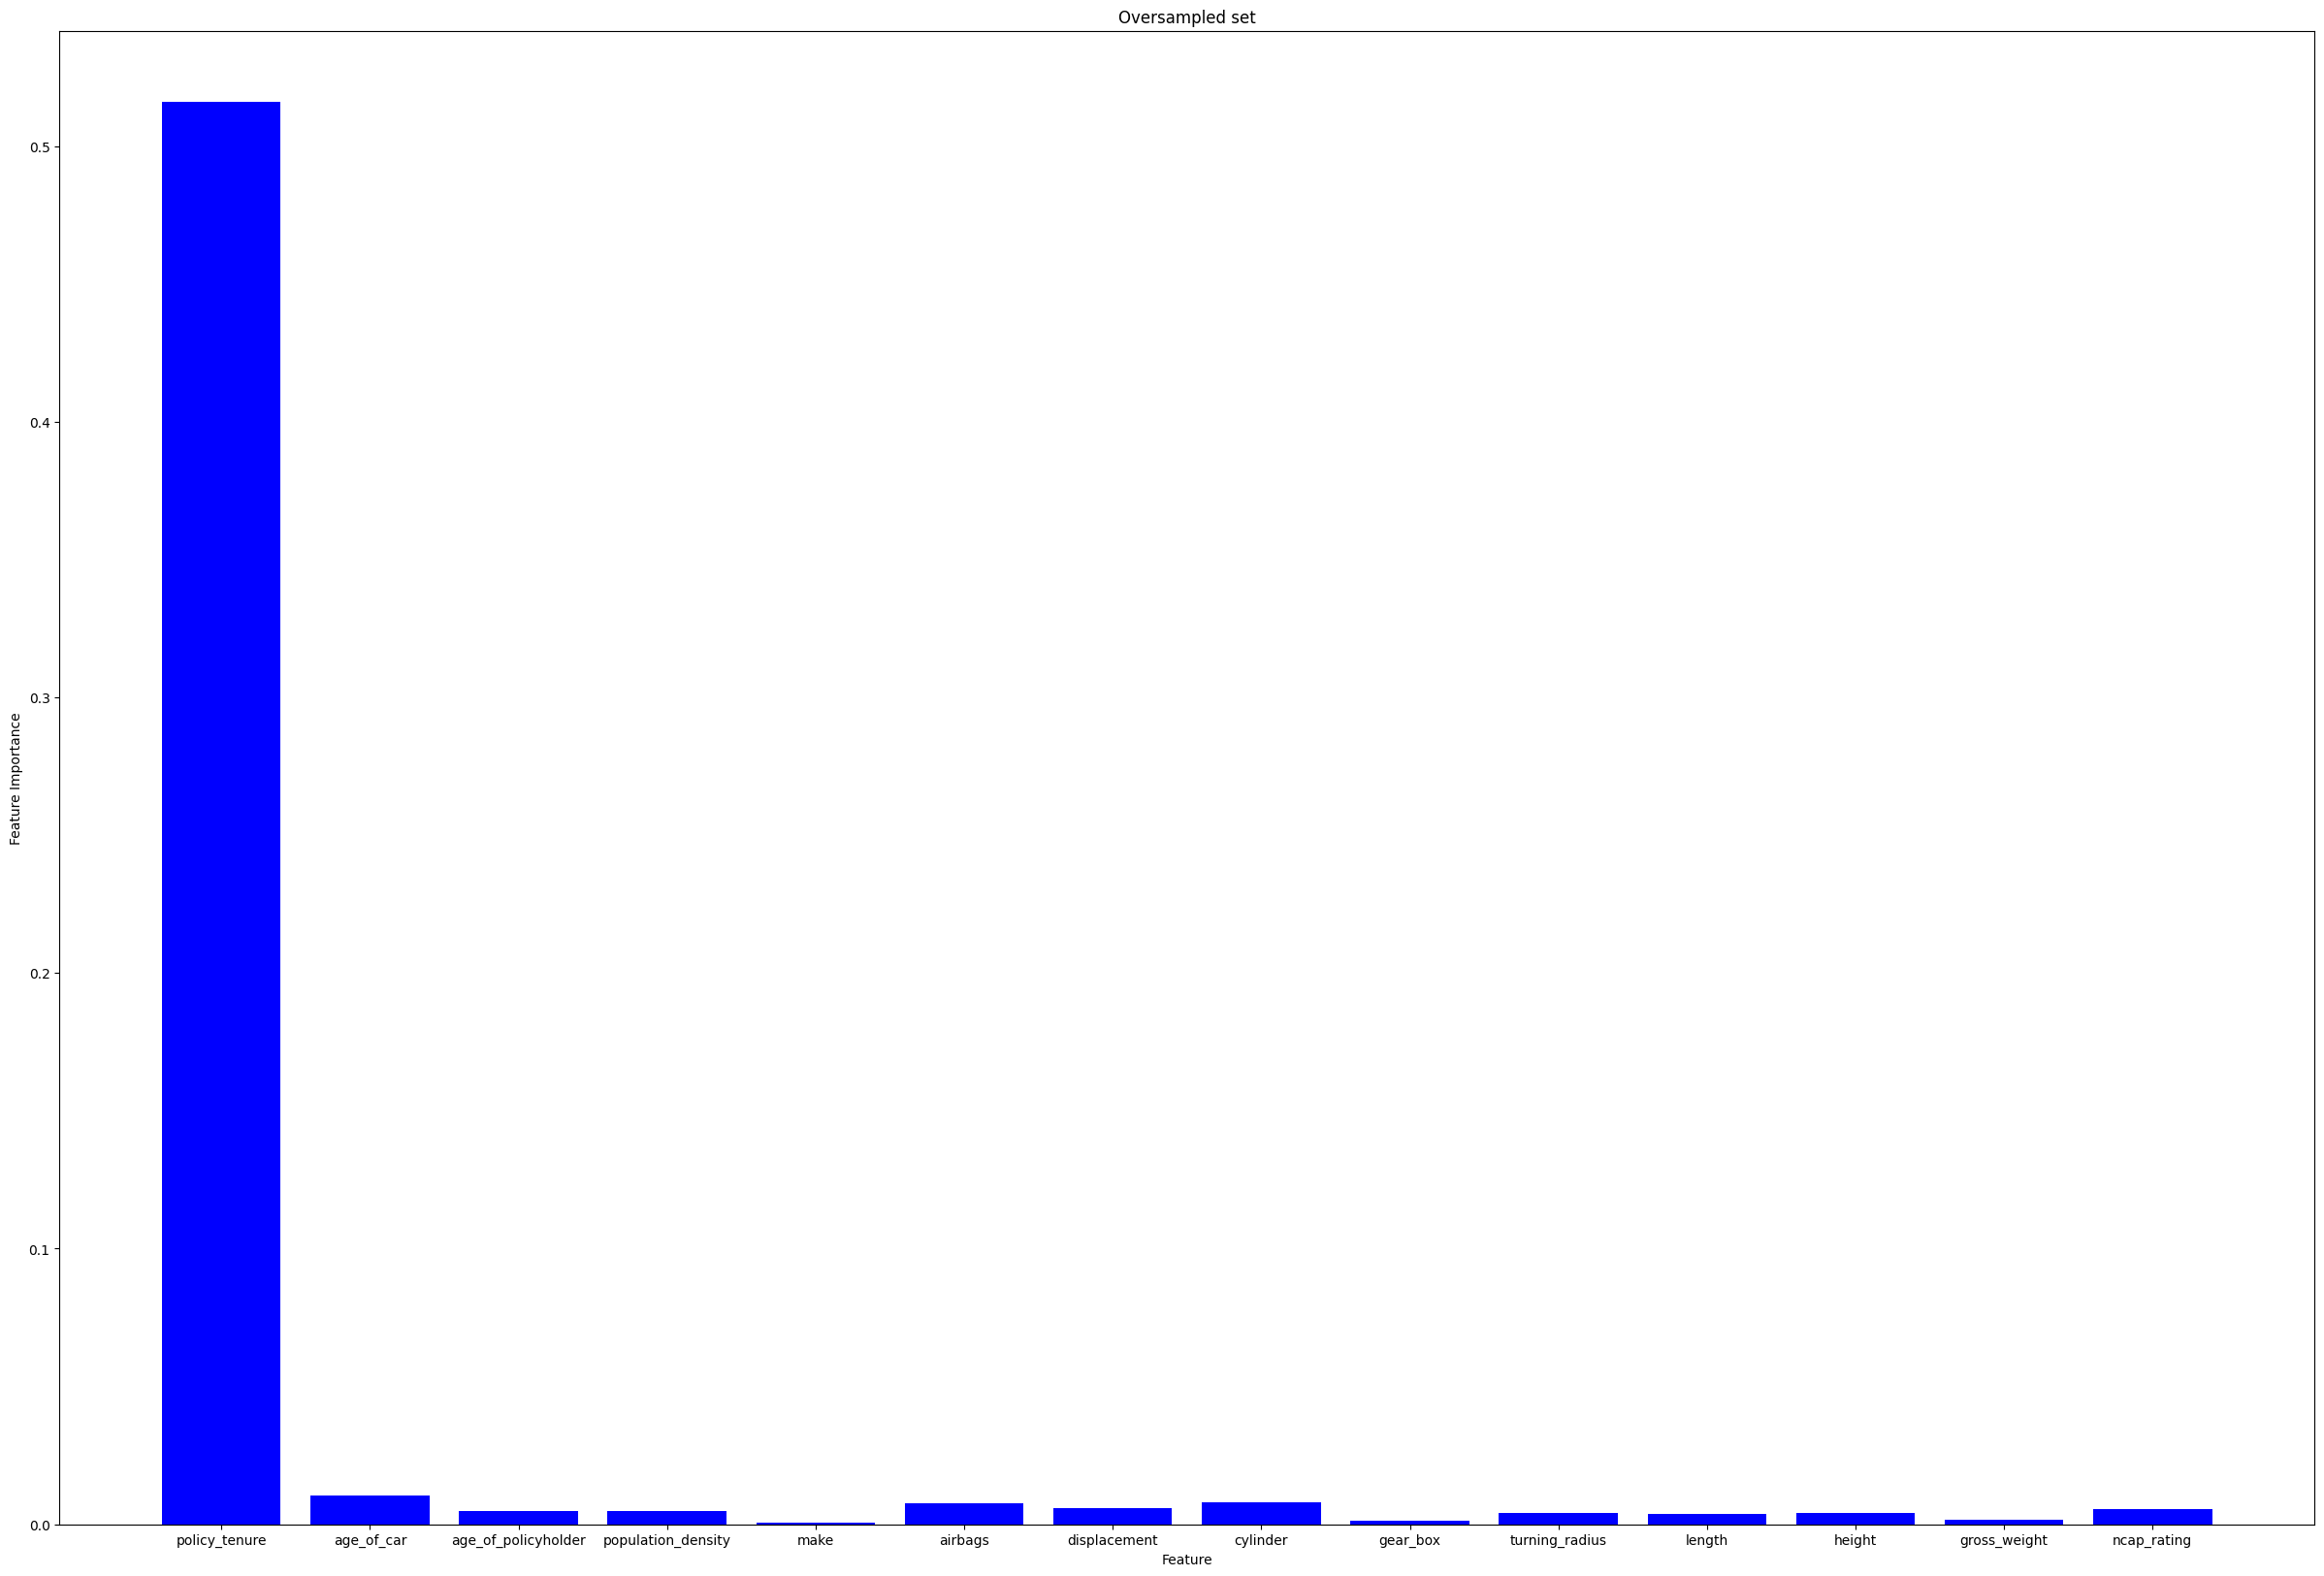

In [53]:
mi_selection(ros_train, numerical_features, y_ros, 'Oversampled set')

***Insight***

- Generally, the range for feature importance of all the sets were small, with the highest range being ~ 0 - 0.5. 
- Generate lists for all selected numerical features.

- *Unsampled Set*:
    - The `cylinder` feature had the most importance to the target. 
    - Only the `airbags` feature was above the desired threshold
    - The `ncap_rating` and `height` features are slightly and should be considered to increase the feature space.

- *Undersampled Set*:
    - The `policy_tenure` had the most feature importance.
    - Only the `cylinder` and `displacement` features were above the desired threshold.

- *Oversampled Set*: 
    - This set yieled different results 
    - The `policy_tenure` feature was the only feature of significant importance. 
    - Remaining features should be discarded due to extremely low levels of importance.

In [54]:
#for the unsampled set
mi_un = ['cylinder', 'airbags', 'ncap_rating', 'height']

#for the undersampled set
mi_under = ['policy_tenure', 'cylinder', 'displacement']

#for the oversampled set
mi_over = ['policy_tenure']

## 8.0) Model selection and optimization

- Determine predictive models;
    - Logistic Regression
    - Support Vector Classifier
    - Random Forest Classifier

- Generate predictions for;
    - unfiltered features for the various splits
    - selected features from feature selection for various splits

- Evaluate predictions;
    - Classification reports
    - Confusion matrices
    - f1_score and accuracy_score metrics

- Select the best model and set

- Model optimization
    - Hyperparemeter tuning
    - Decision threshold evaluation

In [55]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
base_svc = SVC(random_state=45)
base_rfc = RandomForestClassifier(random_state=45)
base_gbc = GradientBoostingClassifier(random_state=45)
base_ada = AdaBoostClassifier(random_state=45)
base_xgb = XGBClassifier(random_state=45)
base_cat = CatBoostClassifier(random_state=45)

In [58]:
def sampler(model, undersampled, oversampled, unsampled, y_undersampled, y_oversampled, y_unsampled):
    #for undersampled
    model.fit(undersampled,y_undersampled)
    undersampled_preds = model.predict(x_test)
    print('The accuracy score for the {} undersampled set is: {}'.format(model, accuracy_score(y_test, undersampled_preds)))
    print('The f1 score for the {} undersampled set is: {}'.format(model, f1_score(y_test, undersampled_preds)))
    print('\n')

    #for the unsampled
    model.fit(unsampled,y_unsampled)
    unsampled_preds = model.predict(x_test)
    print('The accuracy score for the {} unsampled set is: {}'.format(model, accuracy_score(y_test, unsampled_preds)))
    print('The f1 score for the {} unsampled set is: {}'.format(model, f1_score(y_test, unsampled_preds)))
    print('\n')

    #for the oversampled
    model.fit(oversampled, y_oversampled)
    oversampled_preds = model.predict(x_test)
    print('The accuracy score for the {} oversampled set is: {}'.format(model, accuracy_score(y_test, oversampled_preds)))
    print('The f1 score for the {} oversampled set is: {}'.format(model, f1_score(y_test, oversampled_preds)))
    print('\n')

In [59]:
for i in [base_svc, base_rfc, base_gbc, base_ada, base_xgb, base_cat]:
    sampler(i, rus_train, ros_train, new_train, y_rus, y_ros, y_train)

The accuracy score for the SVC(random_state=45) undersampled set is: 0.5184300341296928
The f1 score for the SVC(random_state=45) undersampled set is: 0.1359461114513166


The accuracy score for the SVC(random_state=45) unsampled set is: 0.9372013651877134
The f1 score for the SVC(random_state=45) unsampled set is: 0.0


The accuracy score for the SVC(random_state=45) oversampled set is: 0.504778156996587
The f1 score for the SVC(random_state=45) oversampled set is: 0.13989330171902786


The accuracy score for the RandomForestClassifier(random_state=45) undersampled set is: 0.5638225255972696
The f1 score for the RandomForestClassifier(random_state=45) undersampled set is: 0.14800000000000002


The accuracy score for the RandomForestClassifier(random_state=45) unsampled set is: 0.9341296928327645
The f1 score for the RandomForestClassifier(random_state=45) unsampled set is: 0.02030456852791878


The accuracy score for the RandomForestClassifier(random_state=45) oversampled set is: 0.91

In [60]:
#generate function to generate classification reports
#generate a function to display confusion matrices and classification reports
def report(true, predicted, string):
    matrix = confusion_matrix(true, predicted)
    print(string + ' ' + 'Confusion Matrix')
    print(matrix)
    print('\n')
    report = classification_report(true, predicted)
    print(string + ' ' + 'Classification Report')
    print(report)

In [61]:
gbc = GradientBoostingClassifier(min_samples_split=4, n_estimators=32, random_state=45, subsample=0.6)


In [62]:
#generate function for logistic regression predictions
def gb_model(sample_df, y_df, cols, f_string):

    gbc.fit(sample_df[cols], y_df)

    preds = gbc.predict(x_test[cols])

    report(y_test, preds, string=f_string)

In [63]:
#for the unsampled set
f_features_un = num_f_classif + un_cat      #f-feature selection
mi_features_un = mi_un + un_cat      #mutual info feature selection

#for the undersampled set
f_features_under = num_f_classif + under_cat
mi_features_under = mi_under + under_cat

#for the oversampled set
f_features_over = num_f_classif + over_cat
mi_features_over = mi_over + over_cat

### 8.1) Unsampled split

#### 8.1.1) Features using F-classification methods

In [64]:
#for svc:
gb_model(new_train, y_train, f_features_un, 'f_classif features')

f_classif features Confusion Matrix
[[2746    0]
 [ 184    0]]


f_classif features Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2746
           1       0.00      0.00      0.00       184

    accuracy                           0.94      2930
   macro avg       0.47      0.50      0.48      2930
weighted avg       0.88      0.94      0.91      2930



d:\insurance_claims\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\insurance_claims\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\insurance_claims\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Insight***

- For the unsampled split, both predictive models performed poorly.
- The SVC model failed to generate any positive occurences.
- The random forests model generated just 20 positive occurences, with only 2 of such occurances being accurately predicted.

#### 8.1.2) Features using mutual information methods

In [65]:
#for svc:
gb_model(new_train, y_train, mi_features_un, 'mutual info')

mutual info Confusion Matrix
[[2746    0]
 [ 184    0]]


mutual info Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2746
           1       0.00      0.00      0.00       184

    accuracy                           0.94      2930
   macro avg       0.47      0.50      0.48      2930
weighted avg       0.88      0.94      0.91      2930



d:\insurance_claims\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\insurance_claims\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\insurance_claims\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Insight***

- Similar to the features selected using f-classification methods, both models performed poorly.
- The SVC model still failed to generate positive occurences with a different set of selected features.
- The random forests generated fewer positive occurences, but had a slightly increase in precision due to the same number of correct positive predictions as the f-classification features.
- As suspected, the unsampled data did not relay enough information to generate predictions.

### 8.2) Undersampled split

#### 8.2.1) Features using F-classification methods

In [66]:
#for svc:
gb_model(rus_train, y_rus, f_features_under, 'f_classif features')

f_classif features Confusion Matrix
[[1362 1384]
 [  54  130]]


f_classif features Classification Report
              precision    recall  f1-score   support

           0       0.96      0.50      0.65      2746
           1       0.09      0.71      0.15       184

    accuracy                           0.51      2930
   macro avg       0.52      0.60      0.40      2930
weighted avg       0.91      0.51      0.62      2930



***Insight***

- The undersampled set led to better performance of both models.
- For the SVC model:
    - Out of 184 **true** positive occurences, the model correctly predicted 110. However, ~1400 predictions were mismatched to achieve this.
    - The precision and recall parameters for the minority class were better, with an accuracy of 52%.
    - The model was able to generate 1425 predictions for the minority class.

- For the random forests:
    - The model correctly predicted 92 positive occurences, with 1369 mismatched predictions-significantly lower than the SVC model.
    - While the precision and recall parameters for the minority class were lower, there was a 5% increase in accuracy.
    - The random forests model generated more predictions for the majority class, which led to the increase in accuracy.

- For the undersampled set, the SVC model performed better.

#### 8.2.2) Features using mutual information methods

In [67]:
#for svc:
gb_model(rus_train, y_rus, mi_features_under, 'mutual info')

mutual info Confusion Matrix
[[1271 1475]
 [  63  121]]


mutual info Classification Report
              precision    recall  f1-score   support

           0       0.95      0.46      0.62      2746
           1       0.08      0.66      0.14       184

    accuracy                           0.48      2930
   macro avg       0.51      0.56      0.38      2930
weighted avg       0.90      0.48      0.59      2930



### 8.3) Oversampled split

#### 8.3.1) Features using F-classification methods

In [68]:
#for svc:
gb_model(ros_train, y_ros, f_features_over, 'f_classif features')

f_classif features Confusion Matrix
[[1415 1331]
 [  59  125]]


f_classif features Classification Report
              precision    recall  f1-score   support

           0       0.96      0.52      0.67      2746
           1       0.09      0.68      0.15       184

    accuracy                           0.53      2930
   macro avg       0.52      0.60      0.41      2930
weighted avg       0.91      0.53      0.64      2930



***Insight***

#### 8.3.2) Features using mutual information methods

In [69]:
#for svc:
gb_model(ros_train, y_ros, mi_features_over, 'mutual info features')

mutual info features Confusion Matrix
[[1385 1361]
 [  66  118]]


mutual info features Classification Report
              precision    recall  f1-score   support

           0       0.95      0.50      0.66      2746
           1       0.08      0.64      0.14       184

    accuracy                           0.51      2930
   macro avg       0.52      0.57      0.40      2930
weighted avg       0.90      0.51      0.63      2930



***Insight***

### 8.4) Model optimization

- The undersampled set was the best option for the project
- Generate optimized results for svc and random forests models

In [70]:
def best(df, y_df, scorefunc, cols, k_value):
    SelectKBest(score_func=scorefunc, k=k_value).fit_transform(df[cols], y_df)
    print(df[cols].columns[SelectKBest(score_func=scorefunc, k=k_value).fit(df[cols], y_df).get_support()])

In [71]:
best(rus_train, y_rus, mutual_info_classif, initial_features, 10)

Index(['policy_tenure', 'age_of_car', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'transmission_type', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_defogger',
       'is_driver_seat_height_adjustable'],
      dtype='object')


In [72]:
best(rus_train, y_rus, mutual_info_classif, initial_features, 5)

Index(['policy_tenure', 'age_of_car', 'gross_weight', 'transmission_type',
       'max_torque'],
      dtype='object')


In [73]:
best(rus_train, y_rus, f_classif, initial_features, 10)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'cylinder', 'is_adjustable_steering',
       'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist',
       'max_torque'],
      dtype='object')


In [74]:
best(rus_train, y_rus, f_classif, initial_features, 5)

Index(['policy_tenure', 'age_of_car', 'population_density', 'cylinder',
       'max_torque'],
      dtype='object')


In [75]:
best(rus_train, y_rus, f_classif, f_features_under, 6)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'cylinder', 'is_parking_sensors'],
      dtype='object')


In [76]:
best(rus_train, y_rus, f_classif, f_features_under, 10)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'cylinder', 'rear_brakes_type', 'is_tpms',
       'is_parking_sensors', 'is_rear_window_wiper',
       'is_rear_window_defogger'],
      dtype='object')


In [77]:
best(rus_train, y_rus, mutual_info_classif, mi_features_under, 5)

Index(['policy_tenure', 'cylinder', 'is_tpms', 'is_parking_sensors',
       'is_rear_window_wiper'],
      dtype='object')


In [78]:
best(rus_train, y_rus, mutual_info_classif, mi_features_under, 10)

Index(['policy_tenure', 'cylinder', 'displacement', 'transmission_type',
       'rear_brakes_type', 'is_parking_camera', 'is_tpms',
       'is_parking_sensors', 'is_rear_window_wiper',
       'is_rear_window_defogger'],
      dtype='object')


In [79]:
from sklearn.feature_selection import SelectFromModel

In [80]:
selector = SelectFromModel(estimator=gbc).fit(rus_train, y_rus)

In [81]:
selector.get_feature_names_out()

array(['population_density', 'policy_tenure', 'age_of_car',
       'age_of_policyholder'], dtype=object)

In [82]:
top_features = ['population_density', 'policy_tenure', 'age_of_car', 'age_of_policyholder']

In [83]:
selector2 = SelectFromModel(estimator=gbc, threshold='0.25*mean').fit(rus_train, y_rus)

In [84]:
f_set2 = list(selector2.get_feature_names_out())

In [85]:
selector3 = SelectFromModel(estimator=gbc, threshold='0.5*mean').fit(rus_train, y_rus)

In [86]:
f_set3 = list(selector3.get_feature_names_out())

In [87]:
len(top_features)

4

In [88]:
len(f_set2)

10

In [89]:
len(f_set3)

8

In [90]:
selector4 = SelectFromModel(estimator=gbc, threshold='0.75*mean').fit(rus_train, y_rus)

In [91]:
f_set4 = list(selector4.get_feature_names_out())

In [92]:
len(f_set4)

7

In [93]:
f_set4

['population_density',
 'displacement',
 'height',
 'gross_weight',
 'policy_tenure',
 'age_of_car',
 'age_of_policyholder']

In [94]:
f_set3

['population_density',
 'displacement',
 'length',
 'height',
 'gross_weight',
 'policy_tenure',
 'age_of_car',
 'age_of_policyholder']

In [95]:
f_set2

['population_density',
 'displacement',
 'length',
 'height',
 'gross_weight',
 'max_torque',
 'steering_type',
 'policy_tenure',
 'age_of_car',
 'age_of_policyholder']

In [96]:
top_features

['population_density', 'policy_tenure', 'age_of_car', 'age_of_policyholder']

In [97]:
gbc.fit(rus_train[top_features], y_rus)

preds2 = gbc.predict(x_test[top_features])

In [98]:
report(y_test, preds2, 'Top features for gbc')

Top features for gbc Confusion Matrix
[[1296 1450]
 [  55  129]]


Top features for gbc Classification Report
              precision    recall  f1-score   support

           0       0.96      0.47      0.63      2746
           1       0.08      0.70      0.15       184

    accuracy                           0.49      2930
   macro avg       0.52      0.59      0.39      2930
weighted avg       0.90      0.49      0.60      2930



In [99]:
gbc.fit(rus_train[f_set2], y_rus)

preds3 = gbc.predict(x_test[f_set2])

report(y_test, preds3, 'Top2')

Top2 Confusion Matrix
[[1388 1358]
 [  54  130]]


Top2 Classification Report
              precision    recall  f1-score   support

           0       0.96      0.51      0.66      2746
           1       0.09      0.71      0.16       184

    accuracy                           0.52      2930
   macro avg       0.52      0.61      0.41      2930
weighted avg       0.91      0.52      0.63      2930



In [100]:
gbc.fit(rus_train[f_set3], y_rus)

preds4 = gbc.predict(x_test[f_set3])

report(y_test, preds4, 'Top3')

Top3 Confusion Matrix
[[1400 1346]
 [  58  126]]


Top3 Classification Report
              precision    recall  f1-score   support

           0       0.96      0.51      0.67      2746
           1       0.09      0.68      0.15       184

    accuracy                           0.52      2930
   macro avg       0.52      0.60      0.41      2930
weighted avg       0.91      0.52      0.63      2930



In [101]:
gbc.fit(rus_train[f_set4], y_rus)

preds5 = gbc.predict(x_test[f_set4])

report(y_test, preds5, 'Top4')

Top4 Confusion Matrix
[[1381 1365]
 [  58  126]]


Top4 Classification Report
              precision    recall  f1-score   support

           0       0.96      0.50      0.66      2746
           1       0.08      0.68      0.15       184

    accuracy                           0.51      2930
   macro avg       0.52      0.59      0.41      2930
weighted avg       0.90      0.51      0.63      2930



In [102]:
f_set2

['population_density',
 'displacement',
 'length',
 'height',
 'gross_weight',
 'max_torque',
 'steering_type',
 'policy_tenure',
 'age_of_car',
 'age_of_policyholder']

In [103]:
x_train.steering_type.value_counts()

steering_type
Power       31792
Electric    22711
Manual       1159
Name: count, dtype: int64

In [104]:
user_features = ['age_of_car', 'age_of_policyholder', 'policy_tenure', 'population_density', 'steering_type']

In [105]:
gbc.fit(rus_train[user_features], y_rus)

user_preds = gbc.predict(x_test[user_features])

report(y_test, user_preds, 'User features')

User features Confusion Matrix
[[1332 1414]
 [  54  130]]


User features Classification Report
              precision    recall  f1-score   support

           0       0.96      0.49      0.64      2746
           1       0.08      0.71      0.15       184

    accuracy                           0.50      2930
   macro avg       0.52      0.60      0.40      2930
weighted avg       0.91      0.50      0.61      2930



In [106]:
#threshold
gbc.fit(rus_train[user_features], y_rus)

threshold = gbc.predict_proba(x_test[user_features])

In [107]:
threshold

array([[0.45782161, 0.54217839],
       [0.58051268, 0.41948732],
       [0.40820178, 0.59179822],
       ...,
       [0.4761264 , 0.5238736 ],
       [0.46443953, 0.53556047],
       [0.51340868, 0.48659132]])

In [108]:
threshold = threshold[:, 1]
threshold_probs = pd.Series(threshold)

In [109]:
threshold_probs.max()

0.6917698484441859

In [110]:
# apply threshold to the probabilities to create labels
def to_labels(probs, threshold):
 return (probs >= threshold).astype('int')
 
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(threshold_probs, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.563, F-Score=0.16102


In [111]:
threshold_preds = pd.Series(np.where(threshold_probs < 0.563, 0, 1))
threshold_preds

0       0
1       0
2       1
3       0
4       0
       ..
2925    1
2926    0
2927    0
2928    0
2929    0
Length: 2930, dtype: int32

In [112]:
report(y_test, threshold_preds, 'Threshold predictions')

Threshold predictions Confusion Matrix
[[1845  901]
 [  89   95]]


Threshold predictions Classification Report
              precision    recall  f1-score   support

           0       0.95      0.67      0.79      2746
           1       0.10      0.52      0.16       184

    accuracy                           0.66      2930
   macro avg       0.52      0.59      0.47      2930
weighted avg       0.90      0.66      0.75      2930



In [113]:
user_features

['age_of_car',
 'age_of_policyholder',
 'policy_tenure',
 'population_density',
 'steering_type']

In [114]:
x_train.steering_type.value_counts()

steering_type
Power       31792
Electric    22711
Manual       1159
Name: count, dtype: int64

In [115]:
new_gbc = GradientBoostingClassifier(n_estimators=16, random_state=45, subsample=0.6)

In [117]:
new_gbc.fit(rus_train[user_features], y_rus)

report(y_test, new_gbc.predict(x_test[user_features]), "Updated GBC")

Updated GBC Confusion Matrix
[[1317 1429]
 [  53  131]]


Updated GBC Classification Report
              precision    recall  f1-score   support

           0       0.96      0.48      0.64      2746
           1       0.08      0.71      0.15       184

    accuracy                           0.49      2930
   macro avg       0.52      0.60      0.40      2930
weighted avg       0.91      0.49      0.61      2930



In [122]:
new_thresh = new_gbc.predict_proba(x_test[user_features])[:, 1]
new_thresh = pd.Series(new_thresh)

# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(new_thresh, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.533, F-Score=0.16085


In [124]:
new_thresh = np.where(new_thresh < 0.533, 0, 1)

In [125]:
report(y_test, new_thresh, "Updated threshold")

Updated threshold Confusion Matrix
[[1638 1108]
 [  71  113]]


Updated threshold Classification Report
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      2746
           1       0.09      0.61      0.16       184

    accuracy                           0.60      2930
   macro avg       0.53      0.61      0.45      2930
weighted avg       0.90      0.60      0.70      2930

